# Trade&Ahead Stock Cluster Analysis Project 


## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.
<br>



## Conclusions

* As with any investment that there is an inherent risk in investing, and that the party facilitating the investment does not provide any guaranteed return on any investments made 
* The stocks were devided into 6 clusters or sectors 
    * Sector 1 was the best for long term investing that can tolerate volatility 
    * Sector 5 was the best for investing in stable stocks with good return 
    * The selection of the other sectors depends on investor's acceptance of investing risk and goals 
 

## Future Recommendations  

* Consider combining the sector and industry information with country information to determine the best countries to invest given the countries growth potential 
* Consider determining how each sector affects other sectors to determine if a change in one sector will ripple across other sectors 
    * See the supply chain management situation from late 2021 through 2022 
* Consider investing the Energy sector has it might turn into a high growth sector the with emphasis on green and renewable energy 
    * This would be a long term investment 
* Consider increasing the number of clusters for both K-means Clustering and Hierarchical Clustering to see if further refinement in the cluster gives better results 

## Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")


<IPython.core.display.Javascript object>

## Function Definitions
<br>


In [2]:
# code to enable the printing of headers in bold and maybe colors


class color:
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"


# print(color.BOLD + 'Hello World !' + color.END)

<IPython.core.display.Javascript object>

In [3]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [4]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [5]:
# function to get a value count and percentage for a column in a dataset


def count_percentage(data, contents):

    """
    To get a value count on a column and its percentage 

    data: dataframe
    contents: column to be counted
   
    """

    function_df = pd.DataFrame(columns=[contents, "Percentage"])
    function_df[contents] = data[contents].value_counts()
    function_df["Percentage"] = data[contents].value_counts(normalize=True)

    print(contents, "with percentage of total \n")
    print(function_df)

    del function_df  # free memory

<IPython.core.display.Javascript object>

In [6]:
# Function to display values on seaborn barplot


def show_values(axs, orient="v", space=0.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = "{:.1f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = "{:.1f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

<IPython.core.display.Javascript object>

## Load Data
<br>
<br>

In [7]:
# read the data
df = pd.read_csv(
    "C:/Users/David/LibreOffice_Personal/DataScience/TestData_Files/stock_data.csv"
)
# Ran code on local machine using Anaconda

df.sample(10)

Ticker Symbol                                Security  \
233           NWL                           Newell Brands   
129           FIS  Fidelity National Information Services   
5             ADM               Archer-Daniels-Midland Co   
330            XL                              XL Capital   
140          GILD                         Gilead Sciences   
277           SPG                Simon Property Group Inc   
83            CVX                           Chevron Corp.   
173           IVZ                            Invesco Ltd.   
224           NEE                          NextEra Energy   
27             AN                          AutoNation Inc   

                GICS Sector                 GICS Sub Industry  Current Price  \
233  Consumer Discretionary          Housewares & Specialties         44.080   
129  Information Technology      Internet Software & Services         60.600   
5          Consumer Staples             Agricultural Products         36.680   
330              Financials     Property & Casualty Insurance         39.180   
140             Health Care                     Biotechnology        101.190   
277             Real Estate                             REITs        194.440   
83                   Energy              Integrated Oil & Gas         89.960   
173              Financials  Asset Management & Custody Banks         33.480   
224               Utilities                    MultiUtilities        103.890   
27   Consumer Discretionary                  Specialty Stores         59.660   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
233         9.980       1.641   19          14       75400000    350000000   
129       -10.554       1.148    7          29      194800000    650800000   
5         -12.017       1.516   10          49     -189000000   1849000000   
330         7.697       0.991   10          99      734422000   1201560000   
140         2.689       1.494   98         148     2824000000  18108000000   
277         5.285       1.136   48          47       88852000   2139375000   
83         12.845       1.751    3          43    -1763000000   4587000000   
173         7.067       1.581   12          67      412000000    968100000   
224         6.238       1.023   12           6       -6000000   2752000000   
27          2.350       1.481   19           1       -1300000    442600000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
233               1.300                 269230769.200     33.908     -2.076  
129               2.220                 293153153.200     27.297    -19.087  
5                 2.990                 618394648.800     12.268      7.497  
330               4.220                 284729857.800      9.284     -7.763  
140              12.370                1463864188.000      8.180      3.159  
277               5.880                 363839285.700     33.068     -1.269  
83                2.460                1864634146.000     36.569      4.764  
173               2.260                 428362831.900     14.814      4.219  
224               6.110                 450409165.300     17.003     -7.353  
27                3.930                 112620865.100     15.181     -7.970

<IPython.core.display.Javascript object>

### Data Overview

In [8]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns.")

There are 340 rows and 15 columns.


<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [10]:
print("The number of null values for each variable is:")
df.isnull().sum()

The number of null values for each variable is:


Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
print("The number of duplicated rows are: ", df.duplicated().sum())

The number of duplicated rows are:  0


<IPython.core.display.Javascript object>

### Notes: 
* No null values 
* No duplicates 
* 340 rows
* 15 Columns 

A complete data set

In [12]:
df.describe().T

count           mean            std  \
Current Price                340.000         80.862         98.055   
Price Change                 340.000          4.078         12.006   
Volatility                   340.000          1.526          0.592   
ROE                          340.000         39.597         96.548   
Cash Ratio                   340.000         70.024         90.421   
Net Cash Flow                340.000   55537620.588 1946365312.176   
Net Income                   340.000 1494384602.941 3940150279.328   
Earnings Per Share           340.000          2.777          6.588   
Estimated Shares Outstanding 340.000  577028337.754  845849595.418   
P/E Ratio                    340.000         32.613         44.349   
P/B Ratio                    340.000         -1.718         13.967   

                                          min            25%           50%  \
Current Price                           4.500         38.555        59.705   
Price Change                          -47.130         -0.939         4.820   
Volatility                              0.733          1.135         1.386   
ROE                                     1.000          9.750        15.000   
Cash Ratio                              0.000         18.000        47.000   
Net Cash Flow                -11208000000.000 -193906500.000   2098000.000   
Net Income                   -23528000000.000  352301250.000 707336000.000   
Earnings Per Share                    -61.200          1.558         2.895   
Estimated Shares Outstanding     27672156.860  158848216.100 309675137.800   
P/E Ratio                               2.935         15.045        20.820   
P/B Ratio                             -76.119         -4.352        -1.067   

                                        75%             max  
Current Price                        92.880        1274.950  
Price Change                         10.695          55.052  
Volatility                            1.696           4.580  
ROE                                  27.000         917.000  
Cash Ratio                           99.000         958.000  
Net Cash Flow                 169810750.000 20764000000.000  
Net Income                   1899000000.000 24442000000.000  
Earnings Per Share                    4.620          50.090  
Estimated Shares Outstanding  573117457.325  6159292035.000  
P/E Ratio                            31.765         528.039  
P/B Ratio                             3.917         129.065

<IPython.core.display.Javascript object>

### Notes 
* There is a wide varince to some of the columns like 
    * Net Cash Flow
    * Net Income
    * Estimated Shares Outstanding 	
    * However, this is not supertizing given some of the counties and corpoations involved 
* Net Cash Flow is negative for the minimum and First Quartile (25%), but this is not surprizing especially if there is an economic downturn. 
* All the other variables do not have tigher variances 

In [8]:
# Setting cols_list as a constant as it will be used in a number of cells

cols_list = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

========================================================================================================================

## Exploratory Data Analysis (EDA)
<br>

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis 

### Plotting histograms and boxplots for all the variables 

The numerical columns in the data are:
	 Current Price
	 Price Change
	 Volatility
	 ROE
	 Cash Ratio
	 Net Cash Flow
	 Net Income
	 Earnings Per Share
	 Estimated Shares Outstanding
	 P/E Ratio
	 P/B Ratio


Wall time: 1.12 s


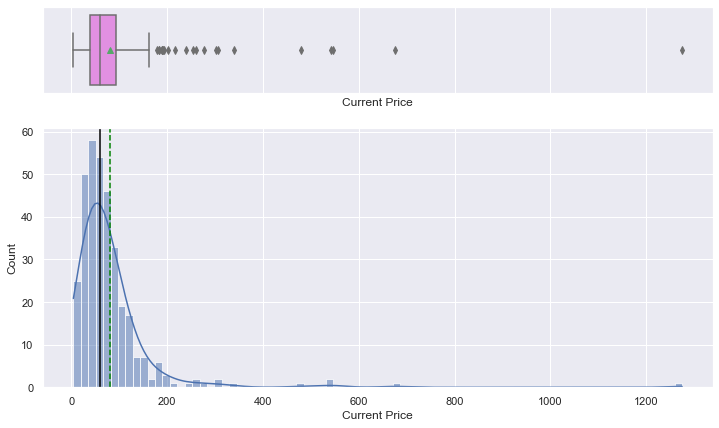

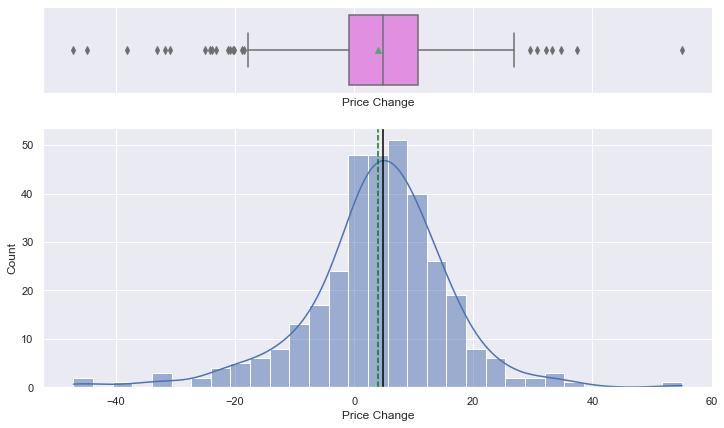

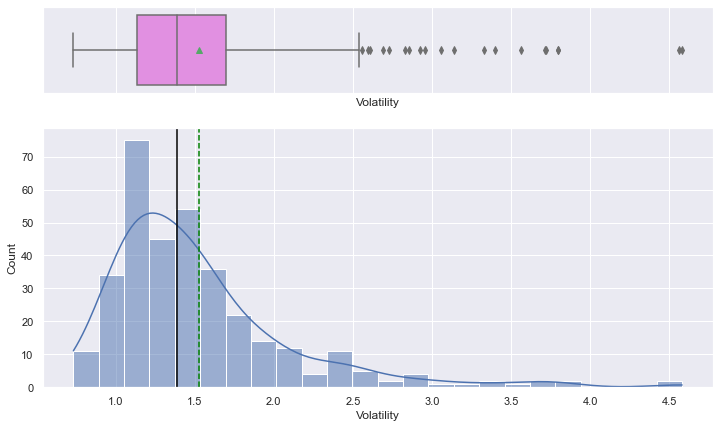

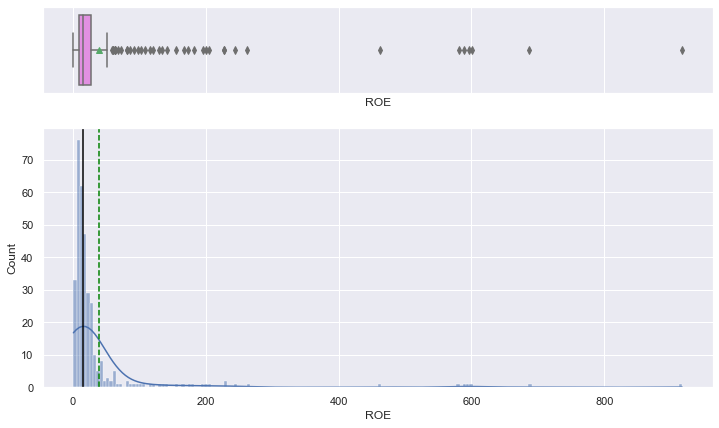

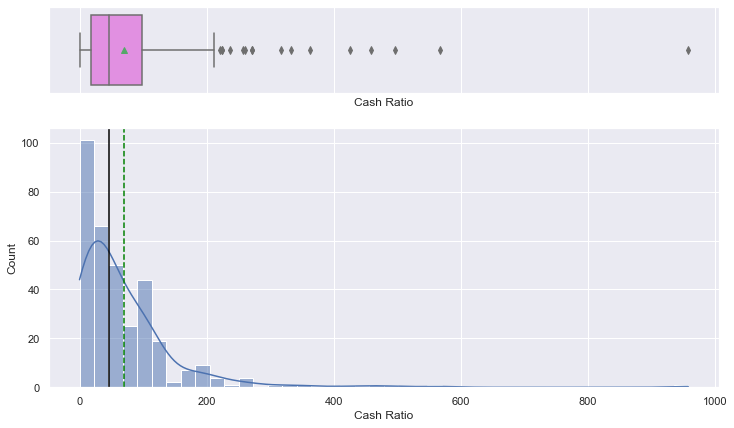

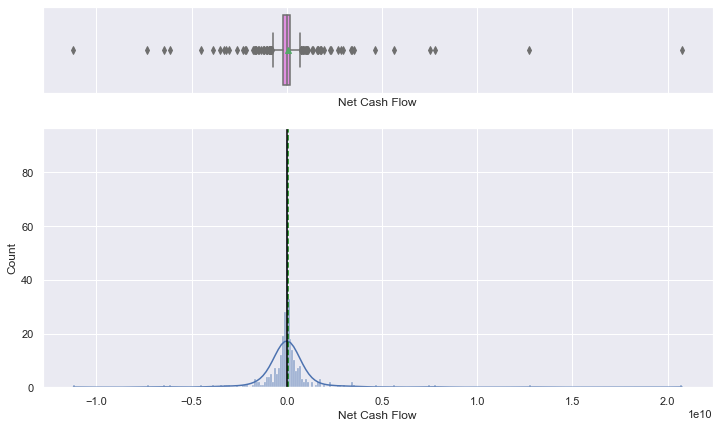

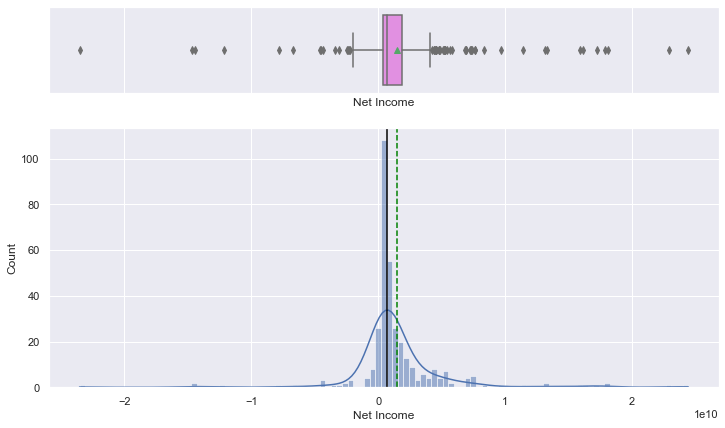

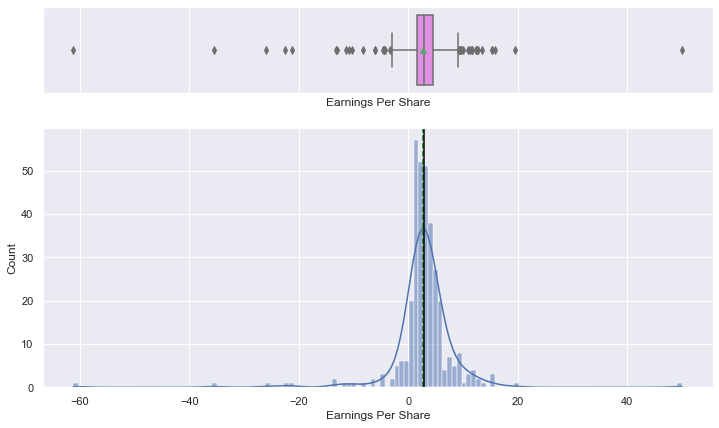

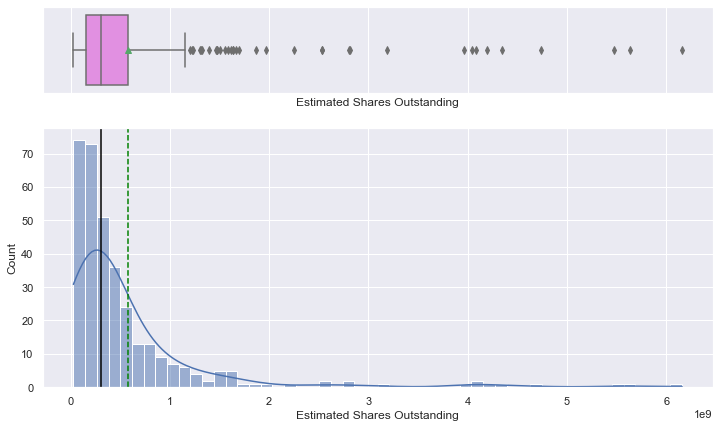

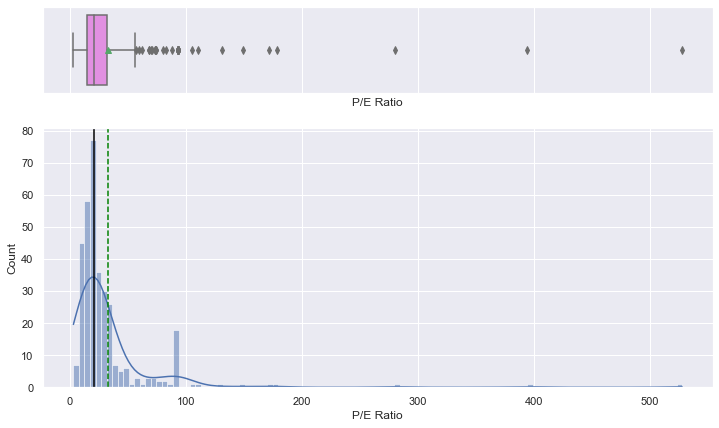

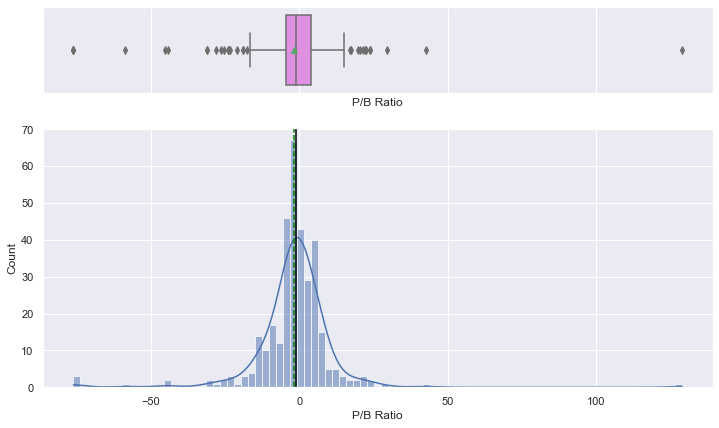

<IPython.core.display.Javascript object>

In [20]:
%%time 

print(color.BOLD + 'The numerical columns in the data are:' + color.END) 
for x in range(len(cols_list)): 
    print('\t', cols_list[x])
print('\n')

for feature in cols_list:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

## Notes: 

* The distribution of the stock prices is either realtivly normal or left skewed 
* These are the prices that are right skewed: 
    * Current Prices 
    * Volatility 
    * ROE 
    * Case Ratio 
    * Estimate Shares Outstanding 
    * P/E Ratio 
* These are the stock prices that are realitivly normally distributed 
    * Price Change 
    * Net Cash Flow 
    * Net Income 
    * Earnings Per Share 
    * P/B Ratio 
    
It is about even when it comes down to which metrics are right skewed and which are realitivly normally distributed 

## GIS Sectors with highest growth rates 

GICS Sector with percentage of total 

                             GICS Sector  Percentage
Industrials                           53       0.156
Financials                            49       0.144
Health Care                           40       0.118
Consumer Discretionary                40       0.118
Information Technology                33       0.097
Energy                                30       0.088
Real Estate                           27       0.079
Utilities                             24       0.071
Materials                             20       0.059
Consumer Staples                      19       0.056
Telecommunications Services            5       0.015
--------------------------------------------------




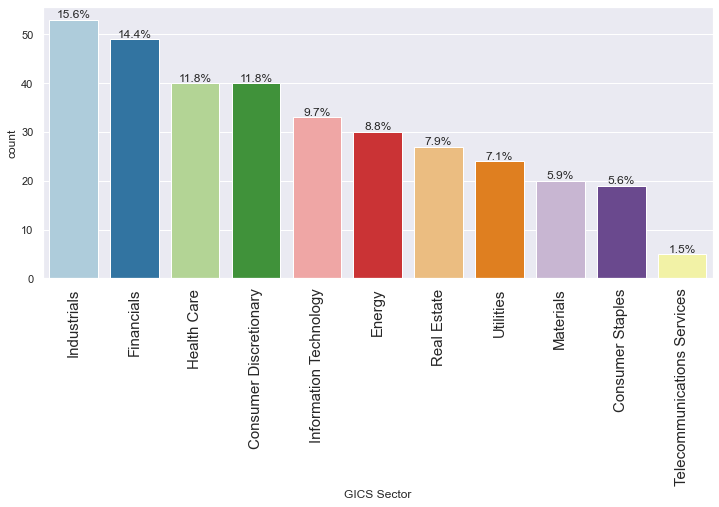

Wall time: 358 ms


<IPython.core.display.Javascript object>

In [9]:
%%time

count_percentage(df, "GICS Sector")
print("-" * 50)
print("\n")
labeled_barplot(df, "GICS Sector")

## Notes

The sectors with the biggest growth are: 
* Indusrtials 
* Financials 
* Heath Care and Consumener Discretionary (tie) 
    
The sector with the least growth is: 
* Telecommunicatons Services 


GICS Sub Industry with percentage of total 

                                                 GICS Sub Industry  Percentage
Oil & Gas Exploration & Production                              16       0.047
REITs                                                           14       0.041
Industrial Conglomerates                                        14       0.041
Electric Utilities                                              12       0.035
Internet Software & Services                                    12       0.035
Health Care Equipment                                           11       0.032
MultiUtilities                                                  11       0.032
Banks                                                           10       0.029
Property & Casualty Insurance                                    8       0.024
Diversified Financial Services                                   7       0.021
Biotechnology                                                    7       0.021
Pharmac

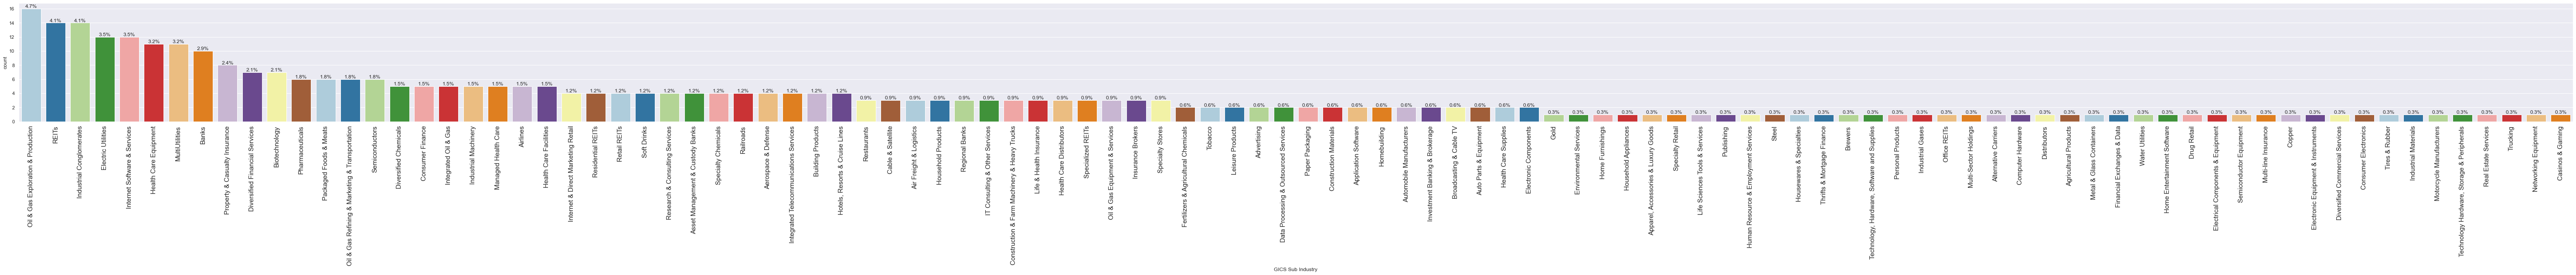

<IPython.core.display.Javascript object>

Wall time: 5.28 s


In [10]:
%%time

count_percentage(df, "GICS Sub Industry")
print("-" * 50)
print("\n")
labeled_barplot(df, "GICS Sub Industry")

## Notes

The subsectors with the largest growth are: 
</br>
    * Note: growth is defined as Growth >= 0.020 
* Oil & Gas Exploration & Production 
* REITs                                                     
* Industrial Conglomerates                                
* Electric Utilities                               
* Internet Software & Services                               
* Health Care Equipment                                    
* MultiUtilities                                            
* Banks          
* Property & Casualty Insurance             
* Diversified Financial Services                  
* Biotechnology     

The subsectors with middle level growth are: 
</br>
    * Note: growth is defined as Growth >= 0.01 and < 0.20 
* Pharmaceuticals                                          
* Packaged Foods & Meats                                       
* Oil & Gas Refining & Marketing & Transportation            
* Semiconductors                                                
* Diversified Chemicals                                         
* Consumer Finance                                             
* Integrated Oil & Gas                                           
* Industrial Machinery                                       
* Managed Health Care                                     
* Airlines                                                    
* Health Care Facilities                                      
* Internet & Direct Marketing Retail                         
* Residential REITs                                            
* Retail REITs                                                  
* Soft Drinks                                               
* Research & Consulting Services                          
* Asset Management & Custody Banks                           
* Specialty Chemicals                                         
* Railroads                                                    
* Aerospace & Defense                                          
* Integrated Telecommunications Services                    
* Building Products                                         
* Hotels, Resorts & Cruise Lines           

All other sectors are low growth. 
</br> 
    * Low growth is defined as Growth < 0.09


### Bivariate Analysis

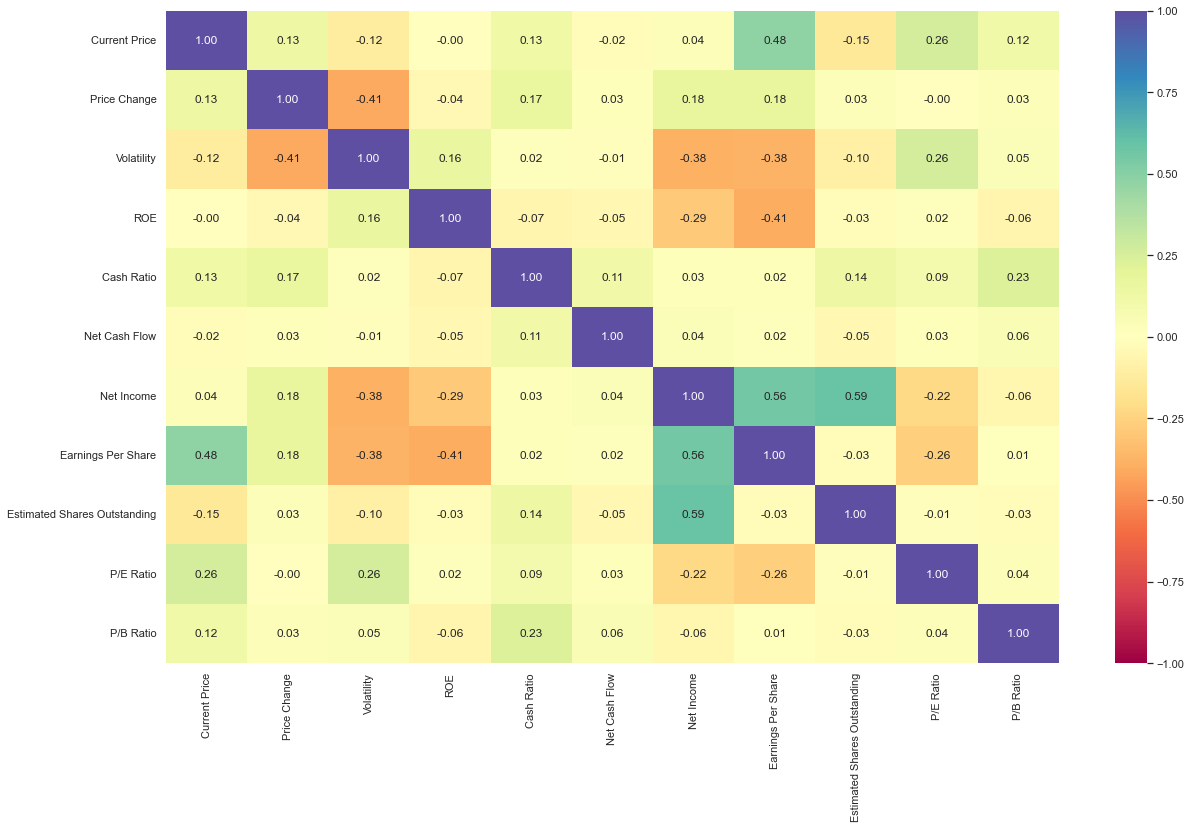

Wall time: 483 ms


<IPython.core.display.Javascript object>

In [7]:
%%time

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Notes: 
 
These variables have a high correlation: 
* Current Price and Earnings Per Share
* Net Income and Estimated Shares Outstanding 
* Net Income and Earnings Per Share
* Earnings Per Share and Net Income  
* Estimated Shares Outstanding and Net Income
* P/B Ratio and Cash Ratio

These variables have a low correlation: 
* Price Change and Volatility
* Volatility and Price Change 
* Volatility and Earnings Per Share   
* Volatility and Net Income
* ROE and Earnings Per Share   
* Net Income and P/E Ratio 
* ROE and Net Income 
* Net Income and Volatility
* Earnings Per Share and P/E Ratio 
* Earnings Per Share and ROE 
* Earnings Per Share and Volatility
* P/E Ratio and Earnings Per Share    
* P/E Ratio and Net Income 

All the other variables have a low positive or low negative correlation. 
This is not surprising that Volatility shows up so many times the low correlation list.  Markets, in general, do not like volatility situation.  This can be seen from the events of 2020 though 2022. 

Wall time: 7.2 s


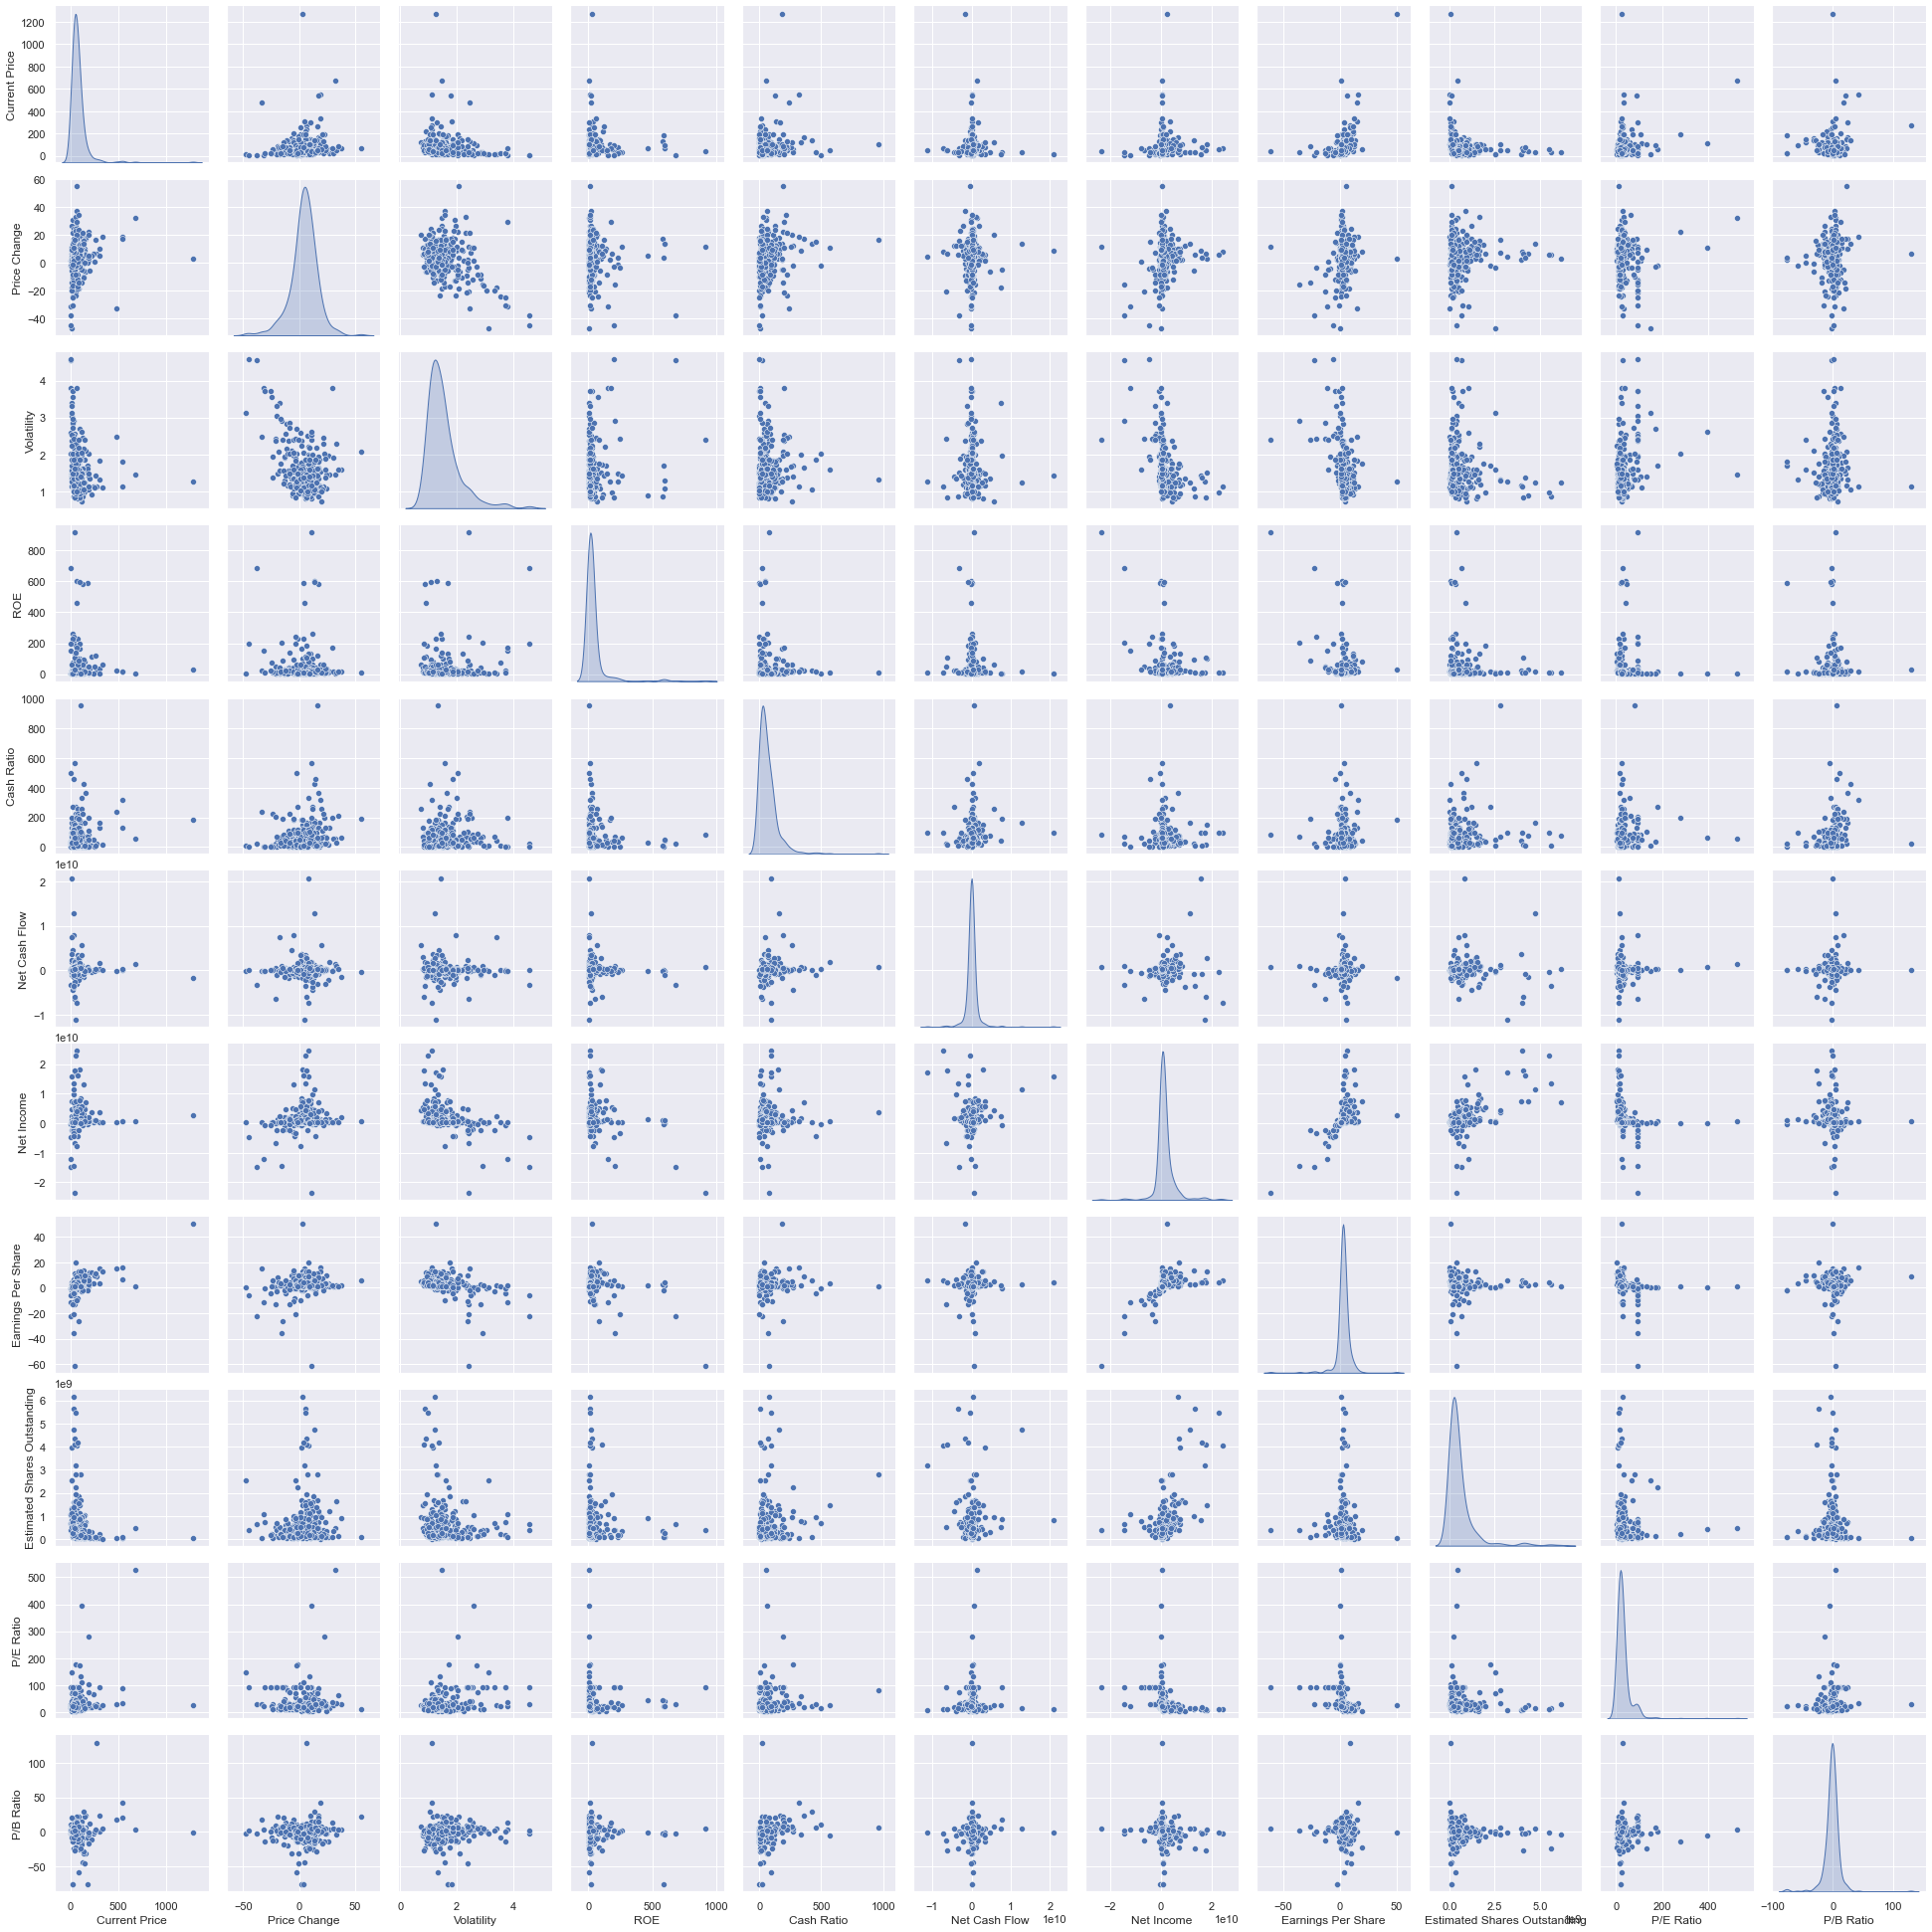

<IPython.core.display.Javascript object>

In [8]:
%%time

tempdf = df.copy(cols_list)

sns.pairplot(tempdf, diag_kind='kde')  

del tempdf

## Notes: 

This chart reinforces what has been see in the heatmap and other graphs.  The variables are not completely independent of each other and the KDE is either right skewed or approximately normally skewed. 

### Check the stocks of which economic sector have seen the maximum price increase on average

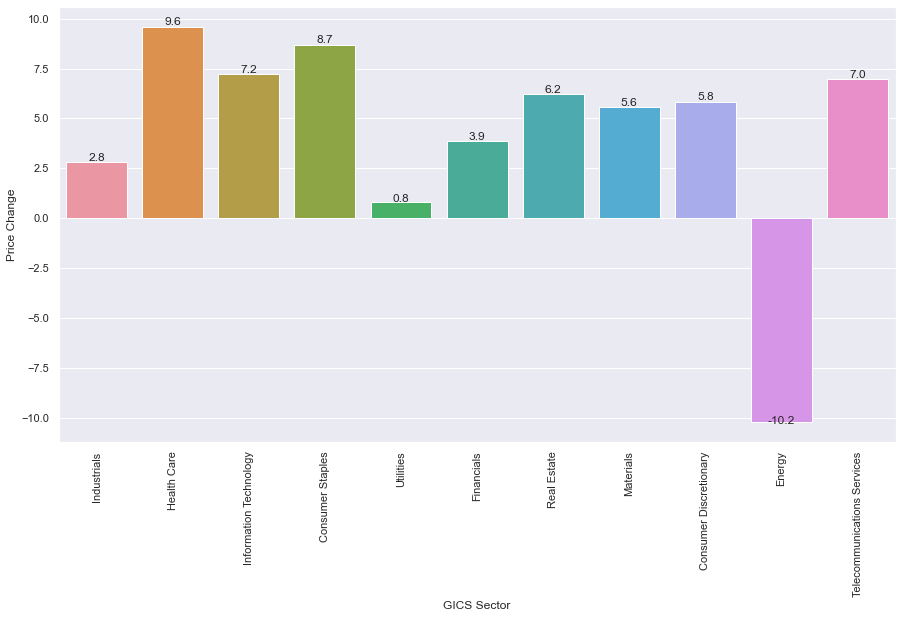

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(15, 8))
p = sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=None)
plt.xticks(rotation=90)

show_values(p)

## Notes: 

* The stocks in each economic sector that have seen the maximum price increase on average are: 
* Health Care 
* Consumer Staples 
* Information Technology 
* Telecommunications Services 
    * Note: "highest: is defined by a growth rate of price increase >=7.0 
    
* The sector with the least growth and frankly negative gowth is: 
    * Energy 
    
Energy seems counter intuitive given the focus on renewalable and green energy 

### Average cash ratio varies across economic sectors

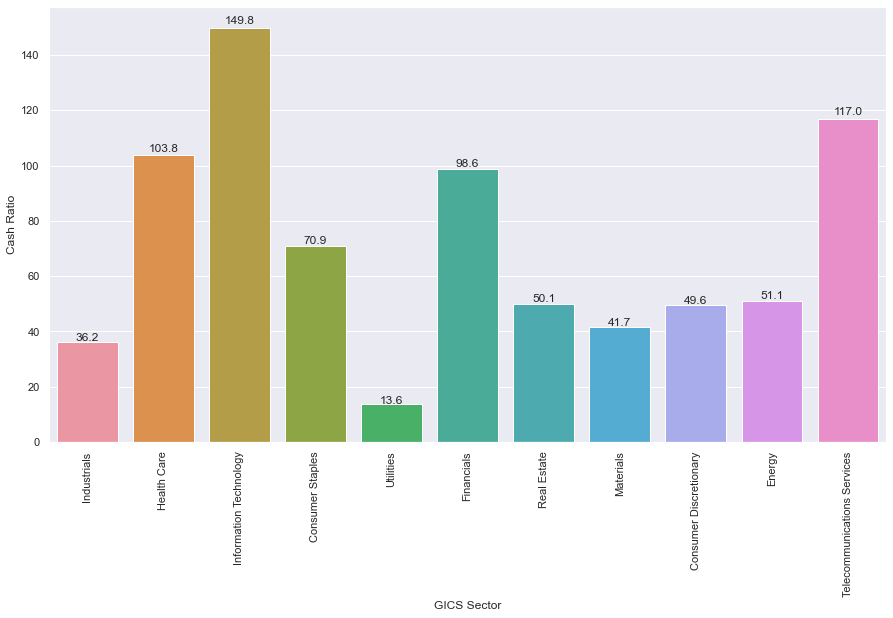

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(15, 8))
p = sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=None)
plt.xticks(rotation=90)

show_values(p)

## Notes: 

The sectors with the highest average cash ratios across the sectors are: 
* Information Technologies 
* Telecommunication Services 
* Health Care 
* Financials 

These sectors will have the greatest chance of meeting their financial obligations, like payroll, from existing cash and cash equivalents without having to generate a debit instrument like Commercial Paper. 

The sectors with the lowest average cash ratios across the sectors are:
* Utilities 
* Industrials 

These sectors will have the lowest chance of meeting their financial obligations, like payroll, from existing cash and cash equivalents without having to generate a debit instrument like Commerical Paper  


### Net cash flow varies across economic sectors

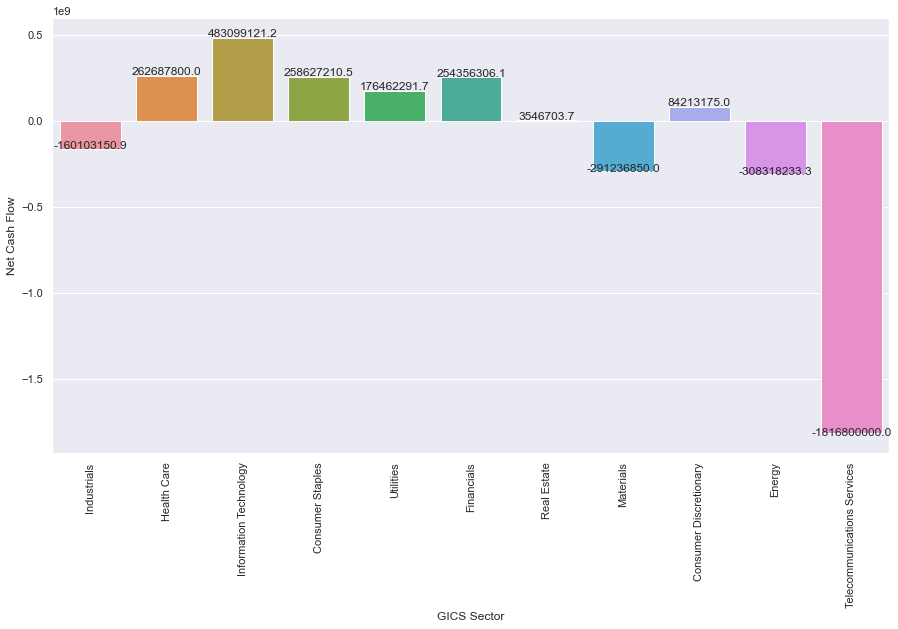

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(15, 8))
p = sns.barplot(data=df, x="GICS Sector", y="Net Cash Flow", ci=None)
plt.xticks(rotation=90)

show_values(p)

## Notes: 

As for actual cash flow across each sector, these sectors have the lowest net cash flow to expenses: 
* Telecommunication Services 
* Energy 
* Materials 
* Industrials 

The real estate sectors is just breaking even. 
</br>
All other sectors have a positive cash flow 


### Average P/E ratio variance across economic sectors

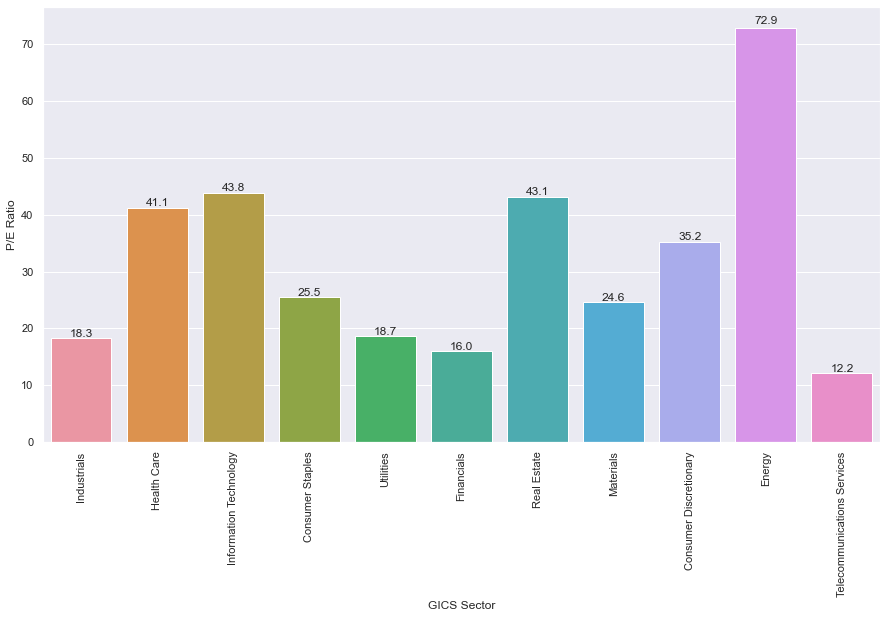

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 8))
p = sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=None)
plt.xticks(rotation=90)

show_values(p)

## Notes: 

The price to earnings ratios are the highest in these sectors: 
* Energy 
* Information Technology 
* Real Estate 
* Health Care 

This means an investor has the greatest chance of getting a positive return in investment if they were to invest in these sectors. 

The price to earnings ratios are the lowest in these sectors: 
* Telecommunication Services 
* Financials
* Utilities 
* Industrials 

This means an investor has the lowest chance of getting a positive return in investment if they were to invest in these sectors. 

### Volatility variance across economic sectors

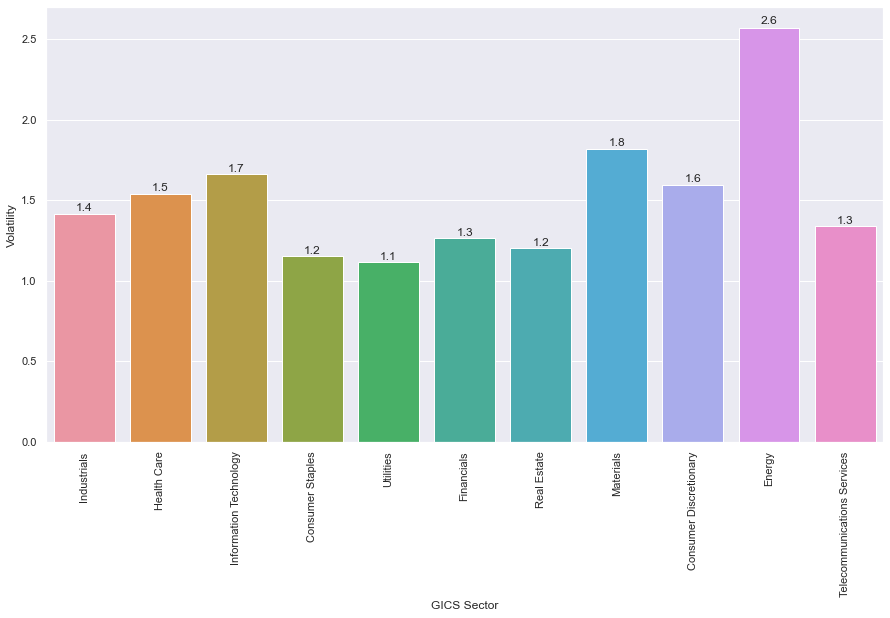

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(15, 8))
p = sns.barplot(data=df, x="GICS Sector", y="Volatility", ci=None)
plt.xticks(rotation=90)

show_values(p)

## Notes:

* The sector with the greatest volatility is the Energy sector with all other sectors not even being close to the level of volatility in this sector 
* The other sectors have a mean volatility of 1.41 
* This means if an investor is going to invest the in Energy sector, they should be ready for a wide ride 


======================================================================================================================

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Notes: 

* No missing values -- Checked in the Data Overview section 
* No duplicates -- Checked in the Data Overview section 

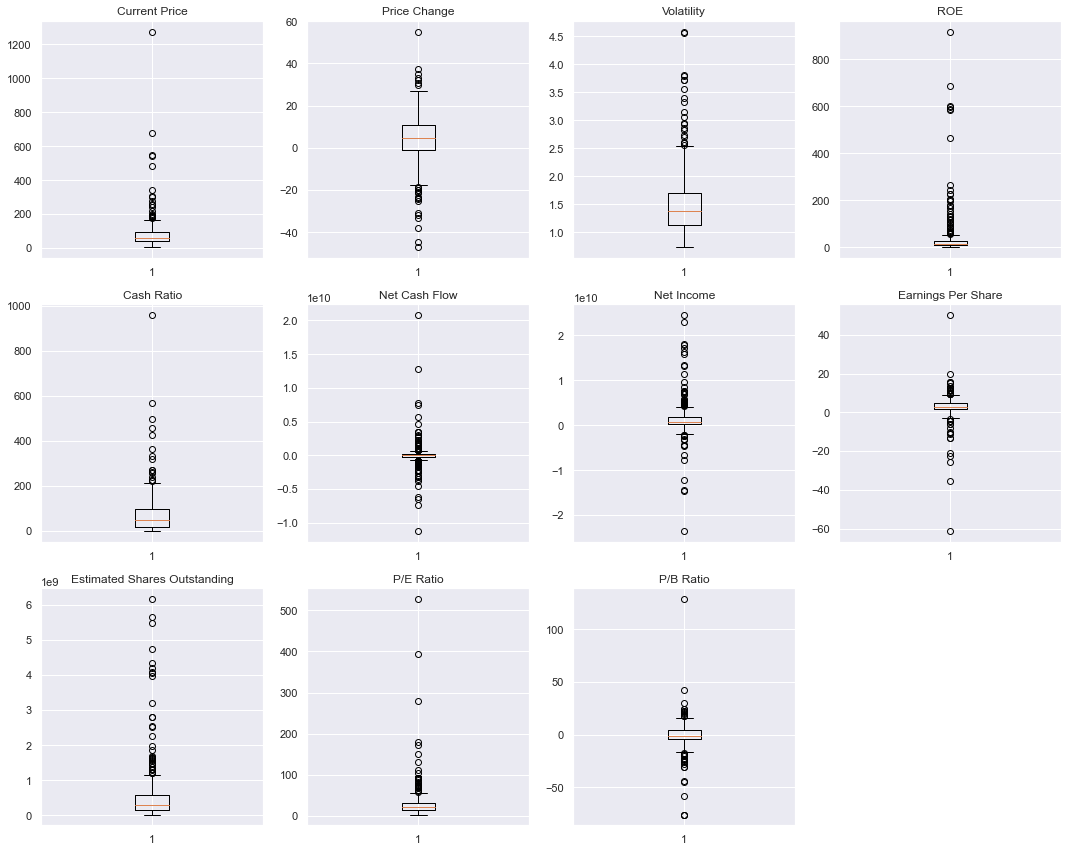

Wall time: 1.08 s


<IPython.core.display.Javascript object>

In [32]:
%%time

plt.figure(figsize=(15, 12))

for i, variable in enumerate(cols_list):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Notes:

* There are many outliers in the data, but this is to be expected as stock prices are very violate and can be subject to wild swings
    * This has been seen from 2020 to the present 
* Feature engineering is not needed  needed)
* Other processioning steps are not needed 
* The data will be used "as-is"
    
The outliers will not be treated as treating them with skew the data to the point the data is not longer valuable 

=====================================================================================================================

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Plotting histograms and boxplots for all the variables at one go

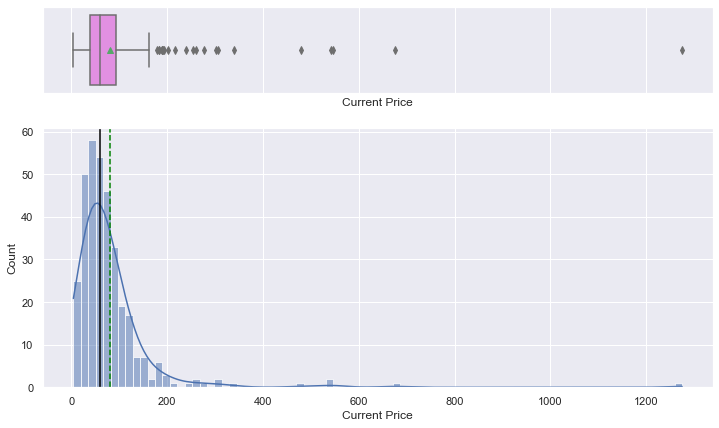

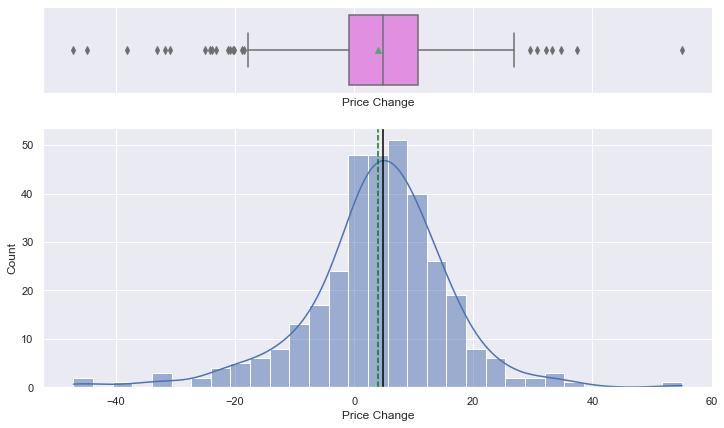

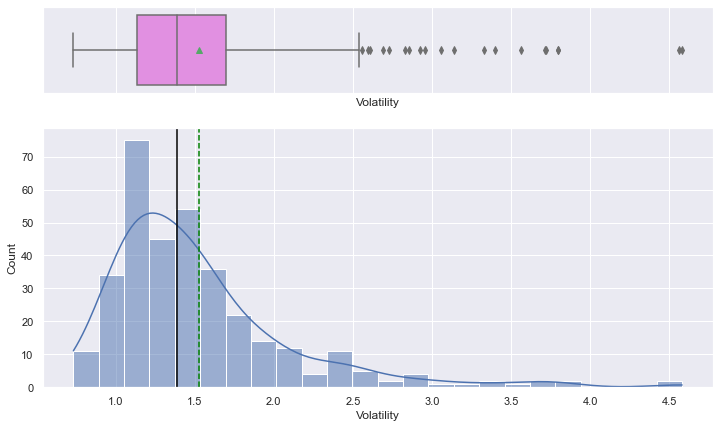

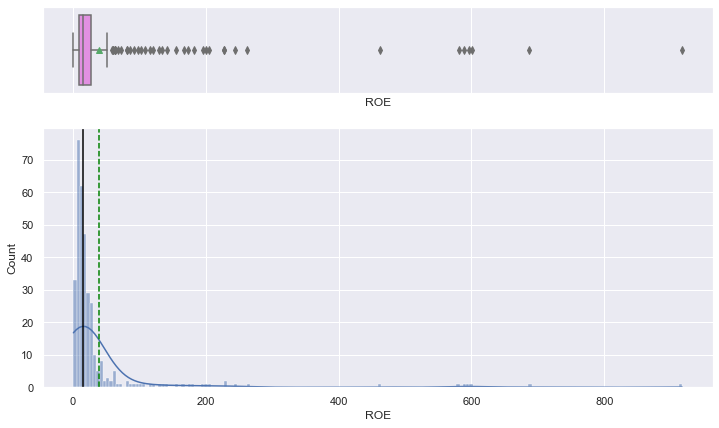

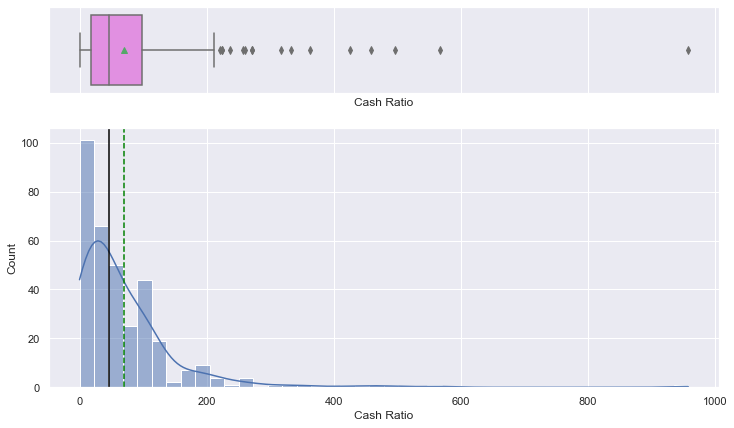

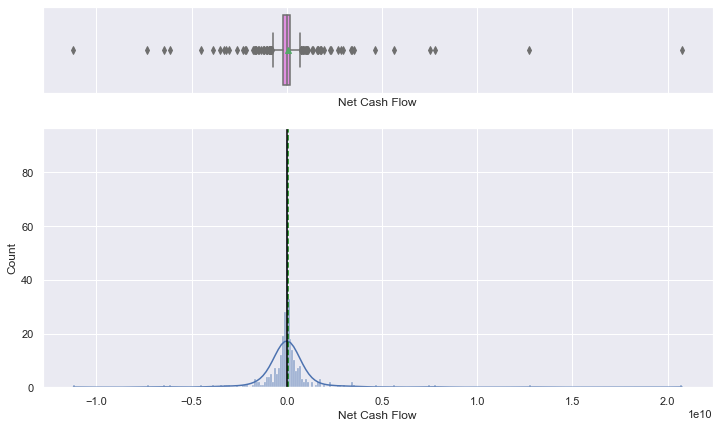

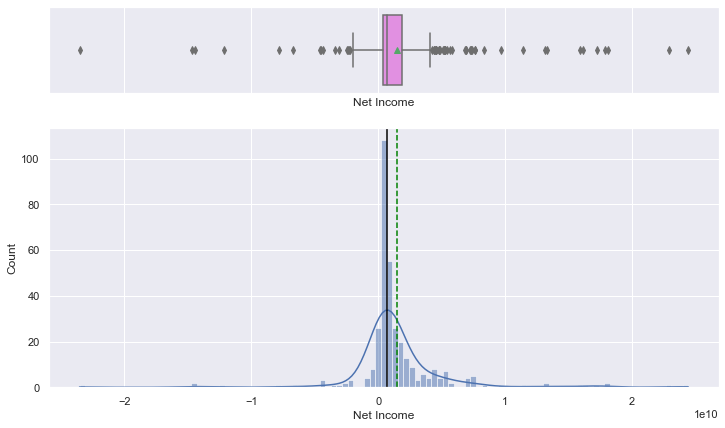

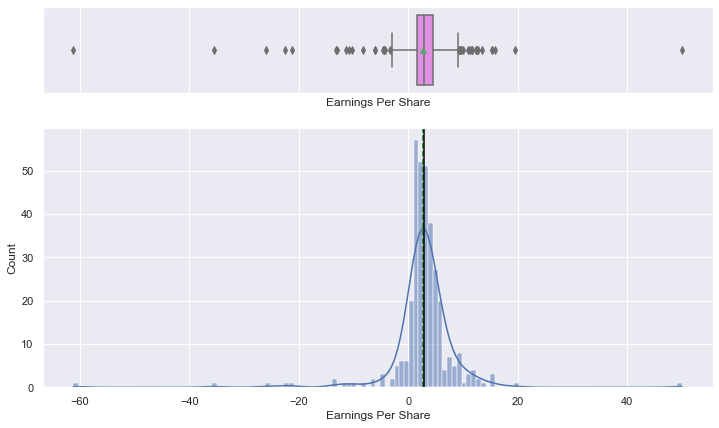

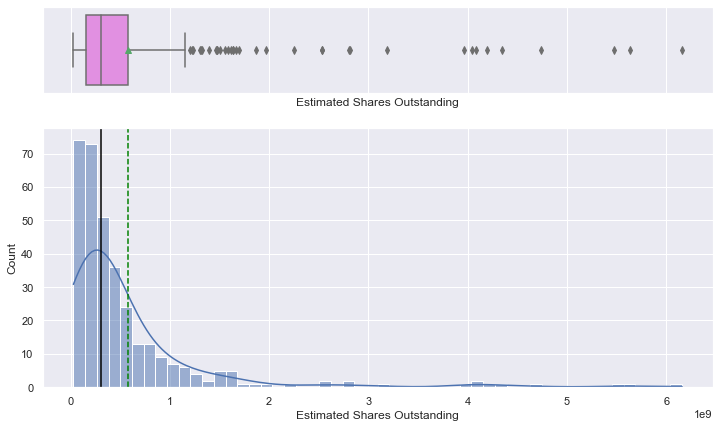

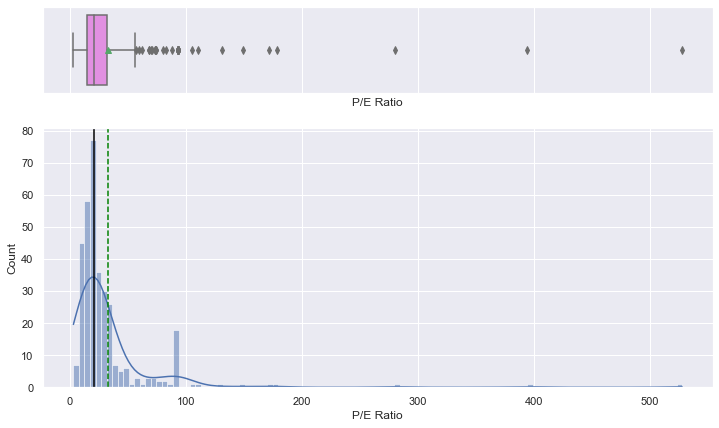

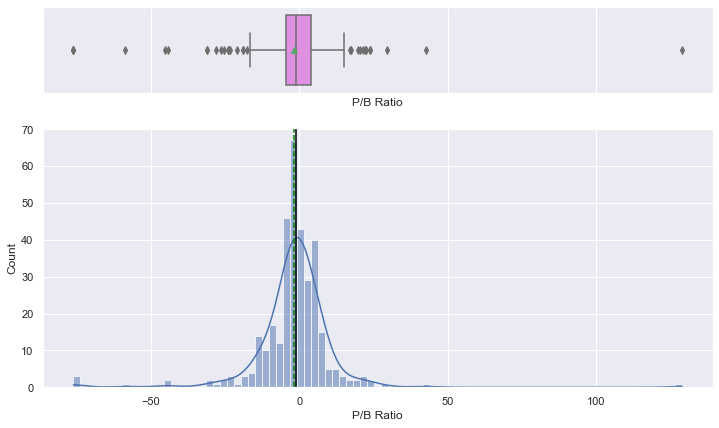

<IPython.core.display.Javascript object>

In [18]:
for feature in cols_list:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

GICS Sector with percentage of total 

                             GICS Sector  Percentage
Industrials                           53       0.156
Financials                            49       0.144
Health Care                           40       0.118
Consumer Discretionary                40       0.118
Information Technology                33       0.097
Energy                                30       0.088
Real Estate                           27       0.079
Utilities                             24       0.071
Materials                             20       0.059
Consumer Staples                      19       0.056
Telecommunications Services            5       0.015
--------------------------------------------------




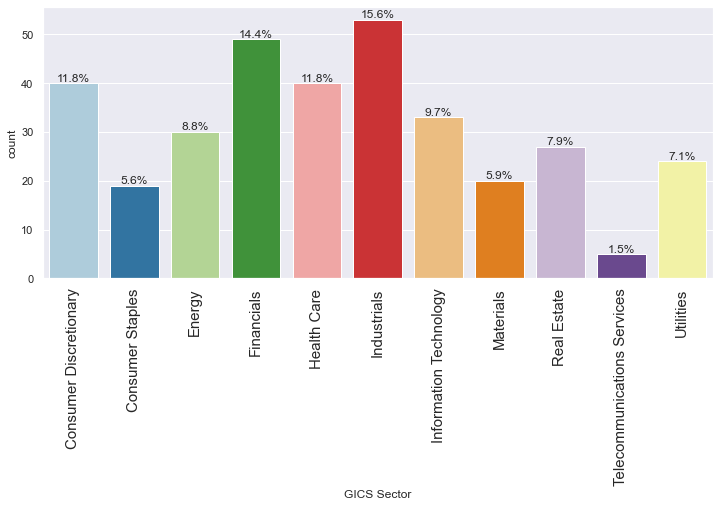

<IPython.core.display.Javascript object>

In [19]:
count_percentage(df, "GICS Sector")
print("-" * 50)
print("\n")
labeled_barplot(df, "GICS Sector")

GICS Sub Industry with percentage of total 

                                                 GICS Sub Industry  Percentage
Oil & Gas Exploration & Production                              16       0.047
REITs                                                           14       0.041
Industrial Conglomerates                                        14       0.041
Electric Utilities                                              12       0.035
Internet Software & Services                                    12       0.035
Health Care Equipment                                           11       0.032
MultiUtilities                                                  11       0.032
Banks                                                           10       0.029
Property & Casualty Insurance                                    8       0.024
Diversified Financial Services                                   7       0.021
Biotechnology                                                    7       0.021
Pharmac

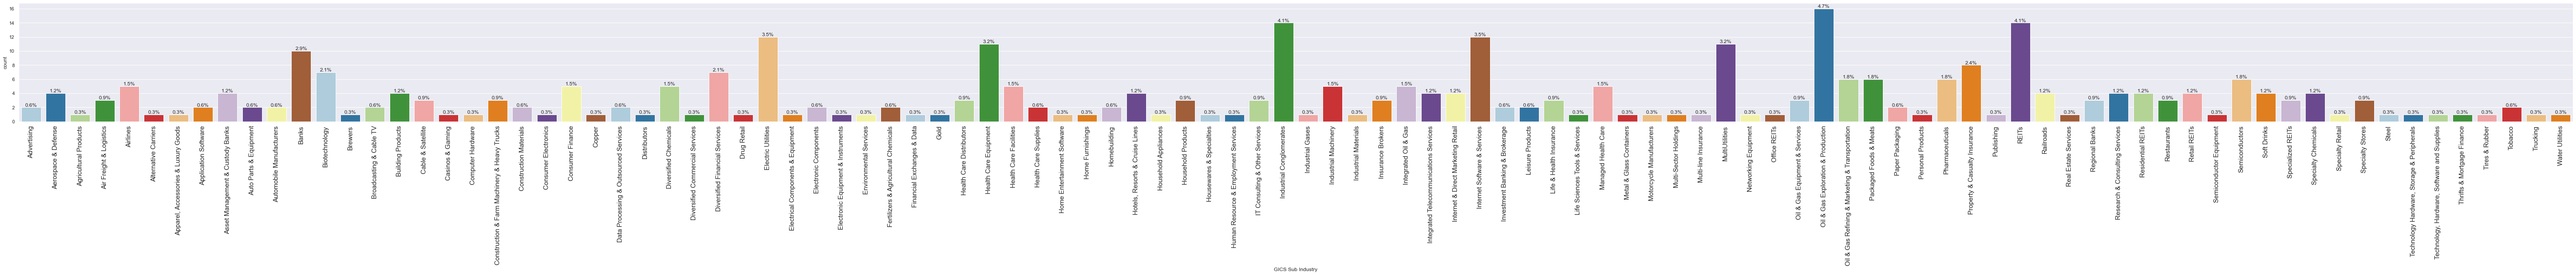

<IPython.core.display.Javascript object>

In [20]:
count_percentage(df, "GICS Sub Industry")
print("-" * 50)
print("\n")
labeled_barplot(df, "GICS Sub Industry")

## Notes 

* No changes to the data 

=====================================================================================================================

## Scaling and Create DataFrame

In [10]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[cols_list].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

subset_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    float64
 4   Cash Ratio                    340 non-null    float64
 5   Net Cash Flow                 340 non-null    float64
 6   Net Income                    340 non-null    float64
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
dtypes: float64(11)
memory usage: 29.3 KB


<IPython.core.display.Javascript object>

## Notes: 

* The same number of rows are in the scaled data set as in in the original dataset.  4
    * This is just a cross check 

Wall time: 9.58 s


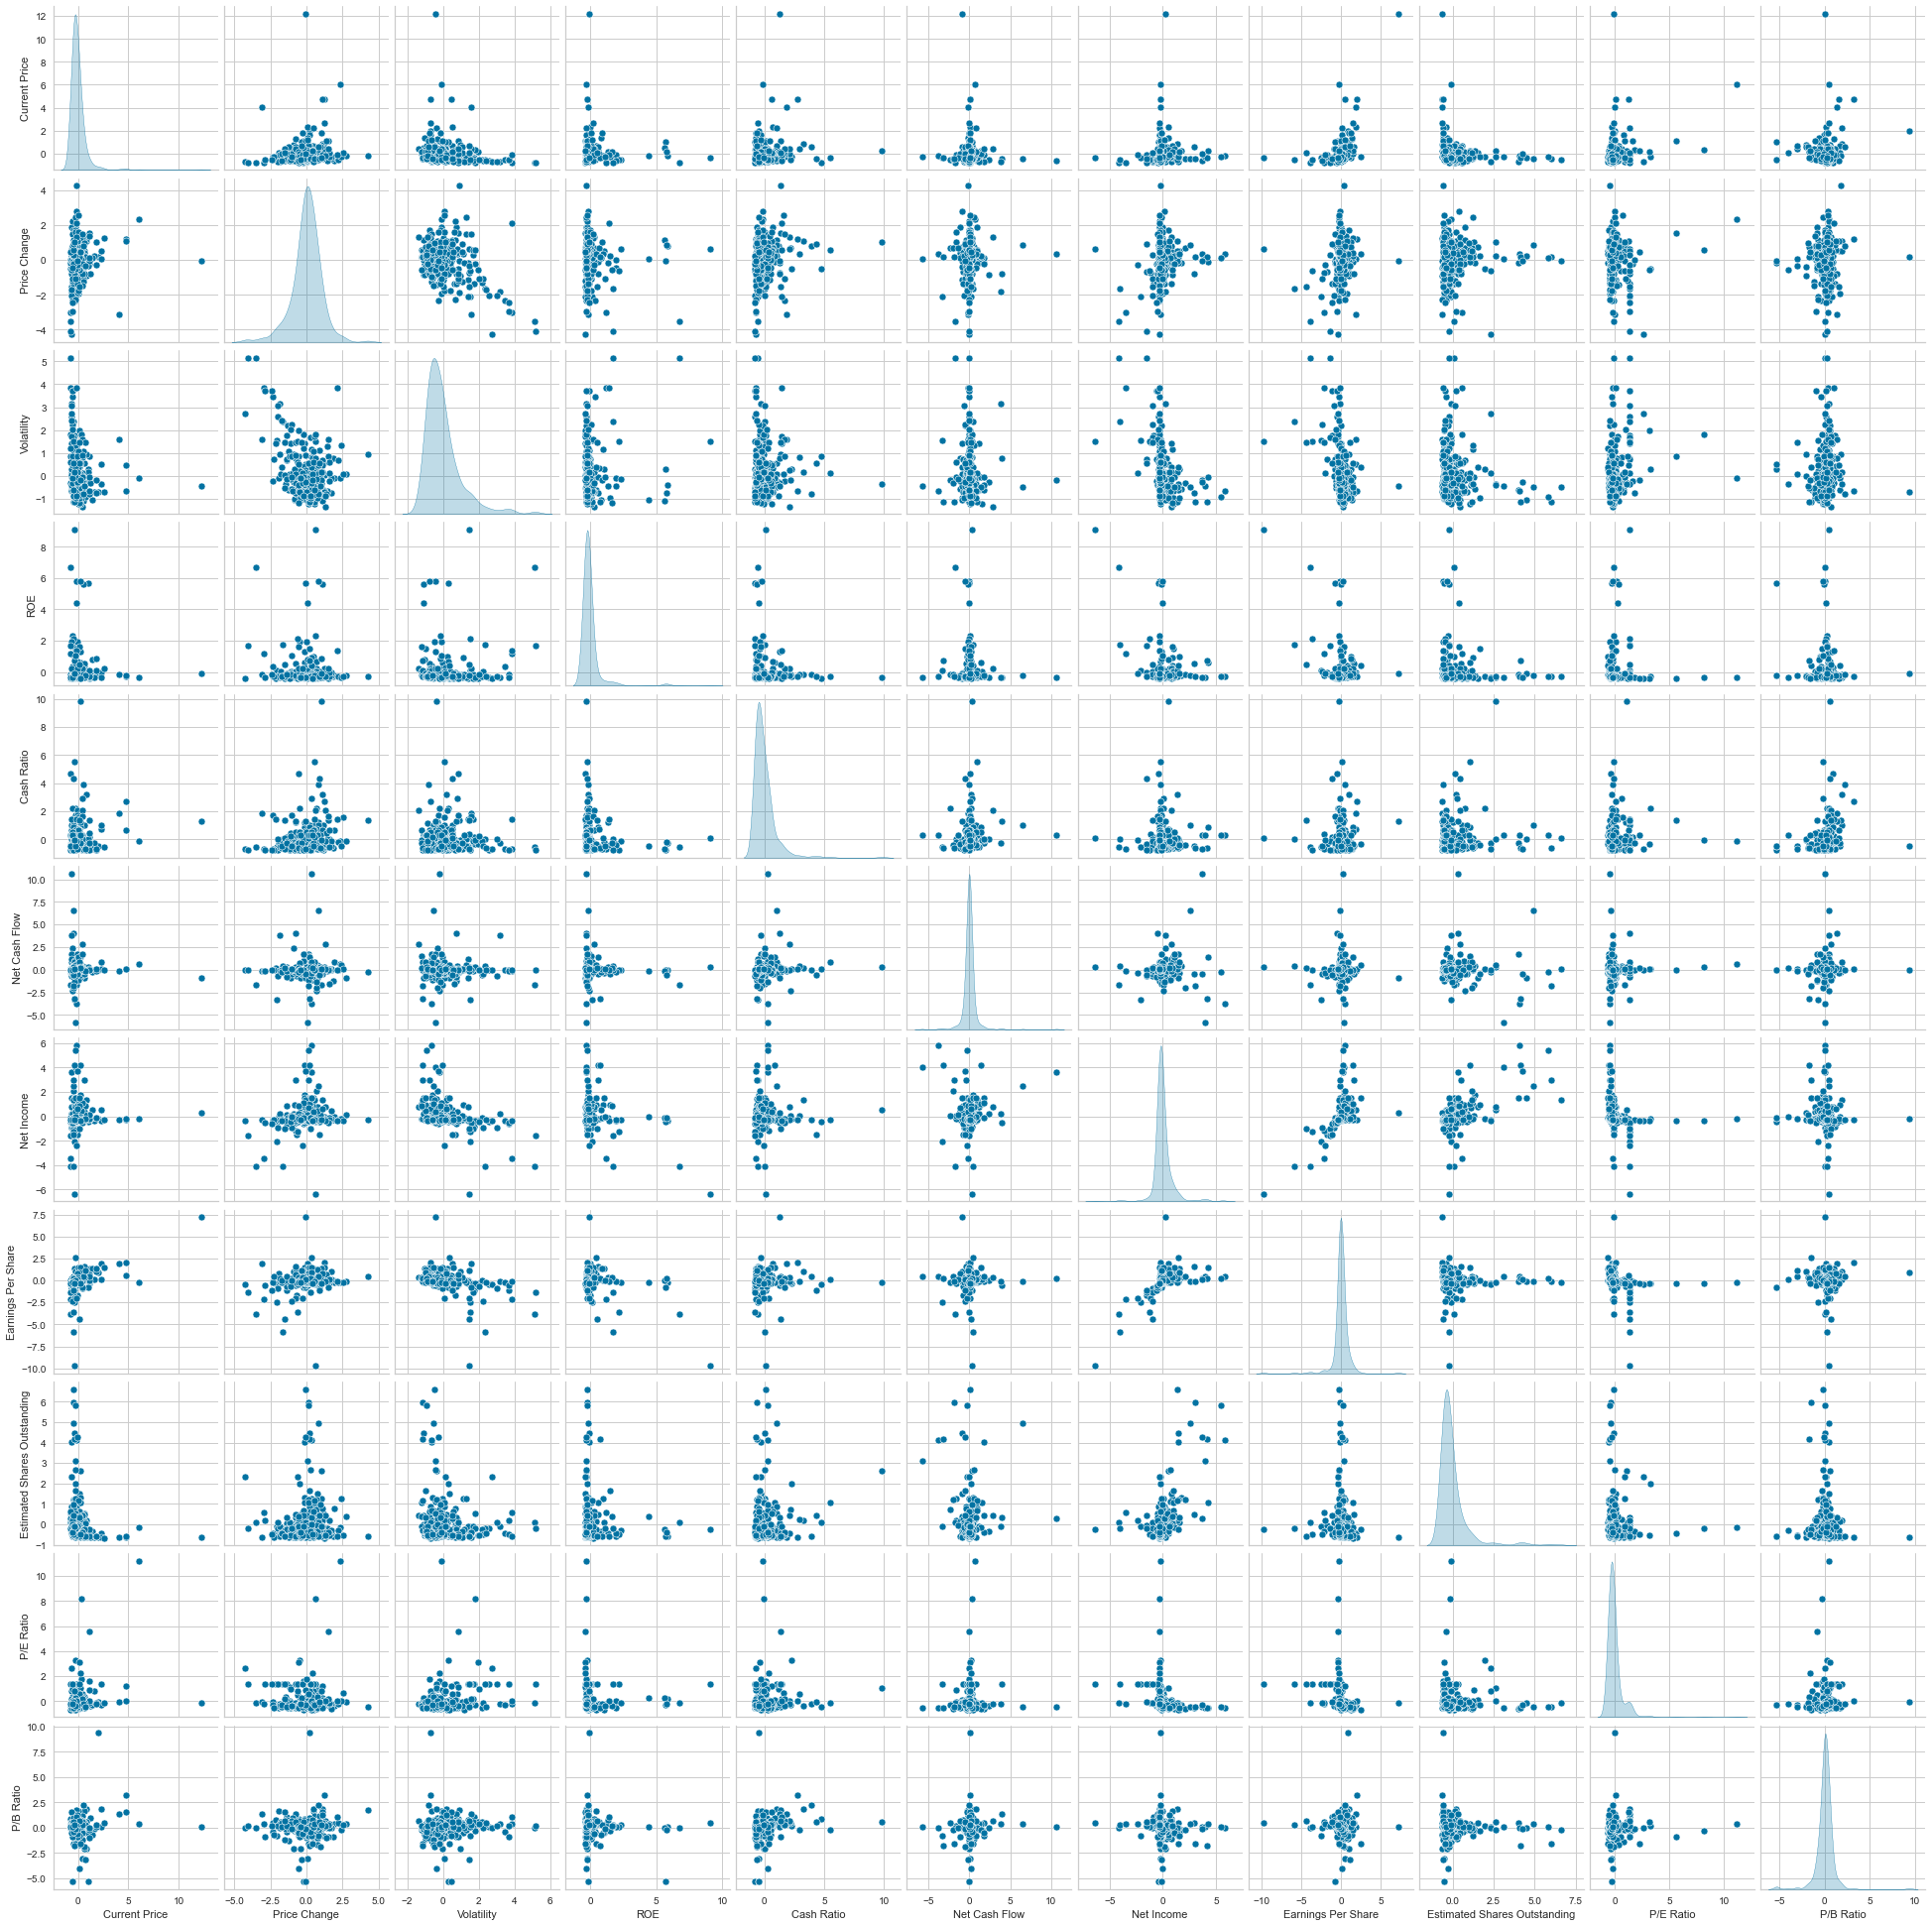

<IPython.core.display.Javascript object>

In [11]:
%%time

sns.pairplot(subset_scaled_df, diag_kind='kde')  


## Notes: 

* The scaled and the original datasets have the same distributions for both KDE and correlation between them

========================================================================================================================

## K-means Clustering

In [11]:
# Making a copy of the scaled data set 

k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

### Checking Elbow Plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466 	 difference: 0.16018849302770377
Number of Clusters: 3 	Average Distortion: 2.2692367155390745 	 difference: 0.11308178335539143
Number of Clusters: 4 	Average Distortion: 2.1745559827866363 	 difference: 0.09468073275243816
Number of Clusters: 5 	Average Distortion: 2.128799332840716 	 difference: 0.0457566499459201
Number of Clusters: 6 	Average Distortion: 2.080400099226289 	 difference: 0.04839923361442722
Number of Clusters: 7 	Average Distortion: 2.0289794220177395 	 difference: 0.05142067720854948
Number of Clusters: 8 	Average Distortion: 1.964144163389972 	 difference: 0.0648352586277674
Number of Clusters: 9 	Average Distortion: 1.9221492045198068 	 difference: 0.041994958870165355
Number of Clusters: 10 	Average Distortion: 1.8513913649973124 	 difference: 0.07075783952249437
Number of Clusters: 11 	Average Distortion: 1.8024134734578485 	 difference: 0

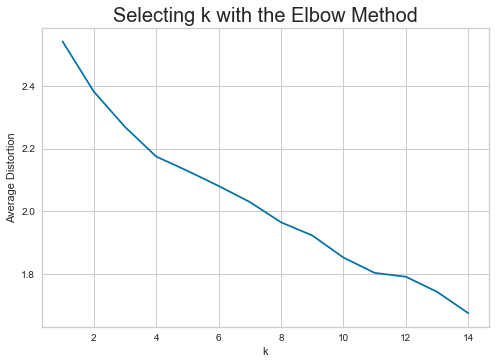

Wall time: 3.65 s


<IPython.core.display.Javascript object>

In [18]:
%%time

clusters = range(1, 15)
meanDistortions = []

i = 1   # for printing difference in distortion 

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)
    
    if i == 1:      # print distortion and difference from previous distortion 
        print("Number of Clusters:", k, "\tAverage Distortion:", distortion)
        pastdist = distortion
        i += 1
    else: 
        print("Number of Clusters:", k, "\tAverage Distortion:", distortion, "\t difference:", pastdist-distortion)
        pastdist = distortion
        i += 1

print('\n')
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

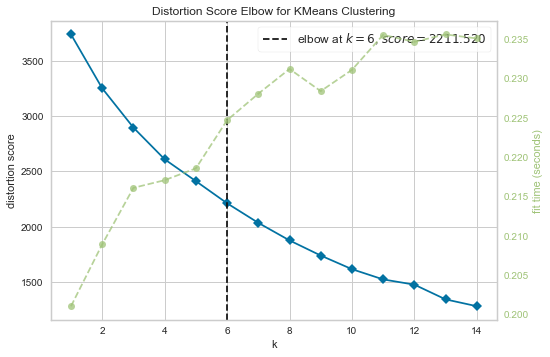

Wall time: 3.48 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [26]:
%%time

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df) 
visualizer.show()

## Notes: 

* There is no obvious break point in the data which would signal an obvious elbow  
    * I am imagine this is very similar to what is seen when working with customers 
* Looking at the differences between the distortion and the previous distortions, I will work with the following number of clusters: 
    * 2 
    * 3 
    * 4 
    * 5 
    * 6 
    
For the silhouette scores, I am going to compute the silhouette scores for the same numbers, plus I am going to compute the score for 10 clusters 
    * I know 10 clusters is incorrect, but I wanted to see what a bad example looked like 

### Checking the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457
For n_clusters = 3, the silhouette score is 0.4644405674779404 	difference: -0.02474417237813581
For n_clusters = 4, the silhouette score is 0.4577225970476733 	difference: 0.006717970430267062
For n_clusters = 5, the silhouette score is 0.43228336443659804 	difference: 0.02543923261107528
For n_clusters = 6, the silhouette score is 0.4005422737213617 	difference: 0.03174109071523634
For n_clusters = 7, the silhouette score is 0.3976335364987305 	difference: 0.002908737222631186
For n_clusters = 8, the silhouette score is 0.40278401969450467 	difference: -0.005150483195774158
For n_clusters = 9, the silhouette score is 0.3778585981433699 	difference: 0.024925421551134752
For n_clusters = 10, the silhouette score is 0.13458938329968687 	difference: 0.24326921484368305
For n_clusters = 11, the silhouette score is 0.1421832155528444 	difference: -0.007593832253157545
For n_clusters = 12, the silhouette score is 0.204466962152

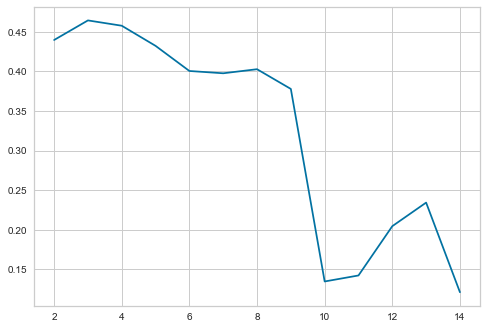



Wall time: 3.21 s


<IPython.core.display.Javascript object>

In [23]:
%%time 

sil_score = []
cluster_list = range(2, 15)
i = 1    # For computing differences in silhouette scores 

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    
    if i == 1:      # print silhouette score and difference from previous silhouette score
        print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))
        i += 1 
        prevscore = score 
    else: 
        print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score), 
              "\tdifference:", prevscore-score)
        i += 1 
        prevscore = score 

plt.plot(cluster_list, sil_score)
plt.show()

print('\n')

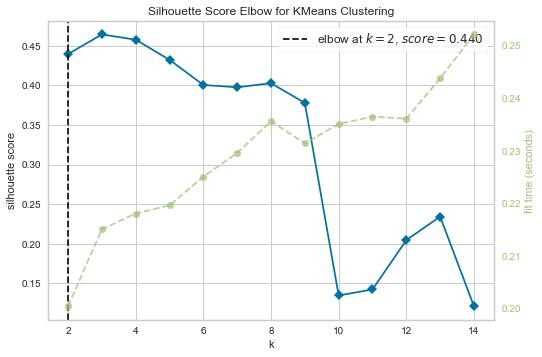

Wall time: 3.3 s


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [28]:
%%time

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df) 
visualizer.show()

### Notes: 


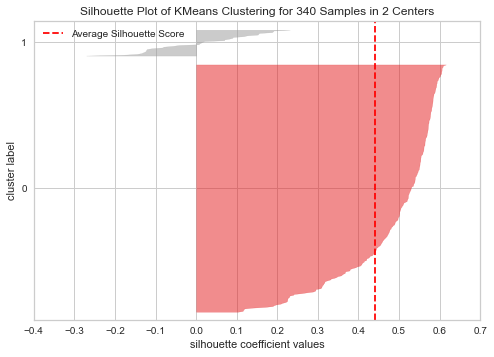

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [29]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

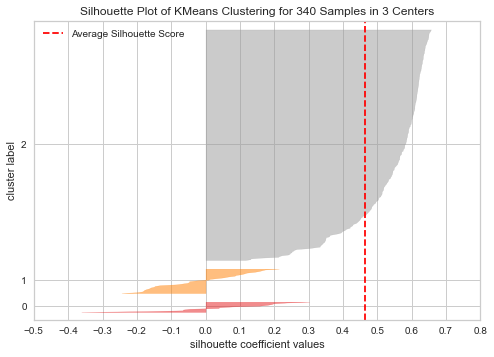

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [30]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

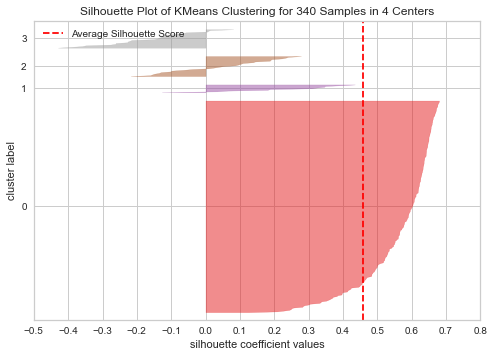

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

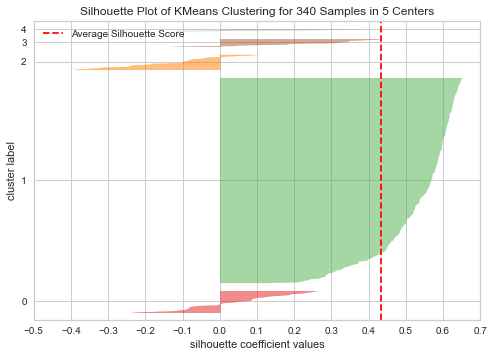

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

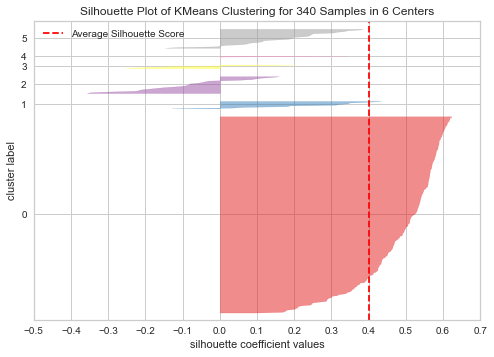

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

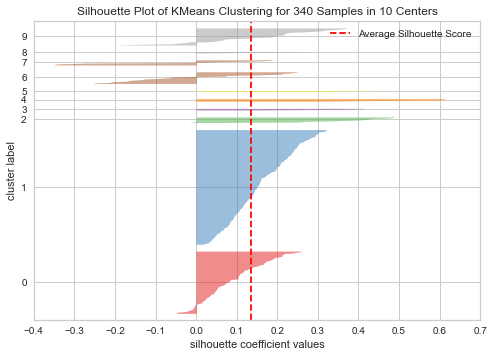

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [16]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [49]:
label = kmeans.fit_predict(k_means_df)


<IPython.core.display.Javascript object>

## Notes: 

* This is my interpretation of the following requirement: 
    * In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
* I was able to do a scatter plot for pairs of values, but not the entire set as once 
* This requirement threw me for a loop



Comparsion of Current Price and Price Change


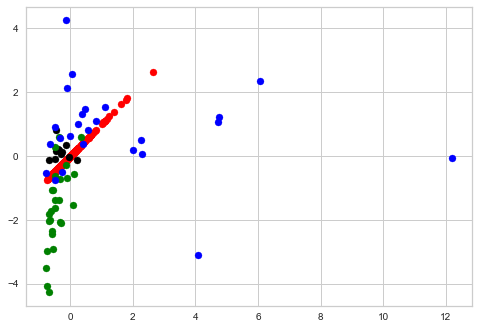

<IPython.core.display.Javascript object>

In [51]:
cols_list = filtered_label0.columns

print("\n")
print("Comparsion of", cols_list[0], "and", cols_list[1])

plt.scatter(label_0[cols_list[0]], label_0[cols_list[0]], color="red")
plt.scatter(label_1[cols_list[0]], label_1[cols_list[1]], color="black")
plt.scatter(label_2[cols_list[0]], label_2[cols_list[1]], color="green")
plt.scatter(label_3[cols_list[0]], label_3[cols_list[1]], color="blue")

plt.show()



Comparsion of Price Change and Volatility


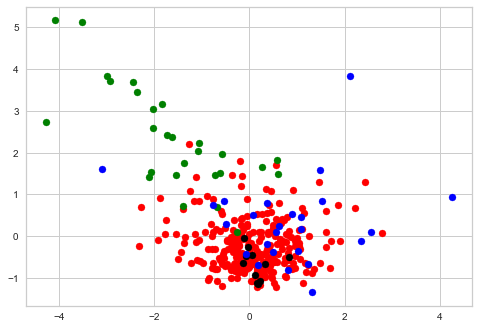

<IPython.core.display.Javascript object>

In [52]:
print("\n")
print("Comparsion of", cols_list[1], "and", cols_list[2])

plt.scatter(label_0[cols_list[1]], label_0[cols_list[2]], color="red")
plt.scatter(label_1[cols_list[1]], label_1[cols_list[2]], color="black")
plt.scatter(label_2[cols_list[1]], label_2[cols_list[2]], color="green")
plt.scatter(label_3[cols_list[1]], label_3[cols_list[2]], color="blue")

plt.show()



Comparsion of Volatility and ROE


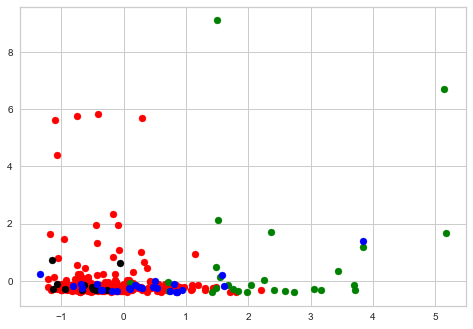

<IPython.core.display.Javascript object>

In [53]:
print("\n")
print("Comparsion of", cols_list[2], "and", cols_list[3])

plt.scatter(label_0[cols_list[2]], label_0[cols_list[3]], color="red")
plt.scatter(label_1[cols_list[2]], label_1[cols_list[3]], color="black")
plt.scatter(label_2[cols_list[2]], label_2[cols_list[3]], color="green")
plt.scatter(label_3[cols_list[2]], label_3[cols_list[3]], color="blue")

plt.show()

In [14]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [16]:
df1["KM_segments"].value_counts()

0    277
2     27
3     25
1     11
Name: KM_segments, dtype: int64

<IPython.core.display.Javascript object>

### Notes  

* As there is definitive kicnk in the elbow, we need to look at the KElbowVisualizer, silhouette scores, and SilhouetteVisualizer plots  
* For all of these, I think 4 is the correct number of n_clusters 
    * The silhouette score is high for the number of n_clusters 
    * KElbowVisualizer is good for the number of n_clusters
    * SilhouetteVisualizer is also good for the n_clusters
    * There is also a definaite kink in the original elbow chart at n_clusters = 4

Given these reasons, I would proceed with N_clusters at 4 


====================================================================================================================

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [36]:
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [37]:
%%time 

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]
print('\n')

i = 1            # For printout formatting   

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        
        i += 1
        if i == 5 :         # For printout formatting   
            print('\n')
            i = 1
        
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('\n')
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

print('\n')            # Formatting for wall time



Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.


Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.


Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524588.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic corr

<IPython.core.display.Javascript object>

### Different linkage methods with Euclidean distance only

In [38]:
%%time 

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]
print('\n')

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('\n')
print('*'*100)

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

print('\n')      # Formatting for Wall Time



Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Wall time: 40 ms


<IPython.core.display.Javascript object>

## Notes 

* Both models agree tat Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage is the model

### Checking Dendrograms

Wall time: 2.77 s


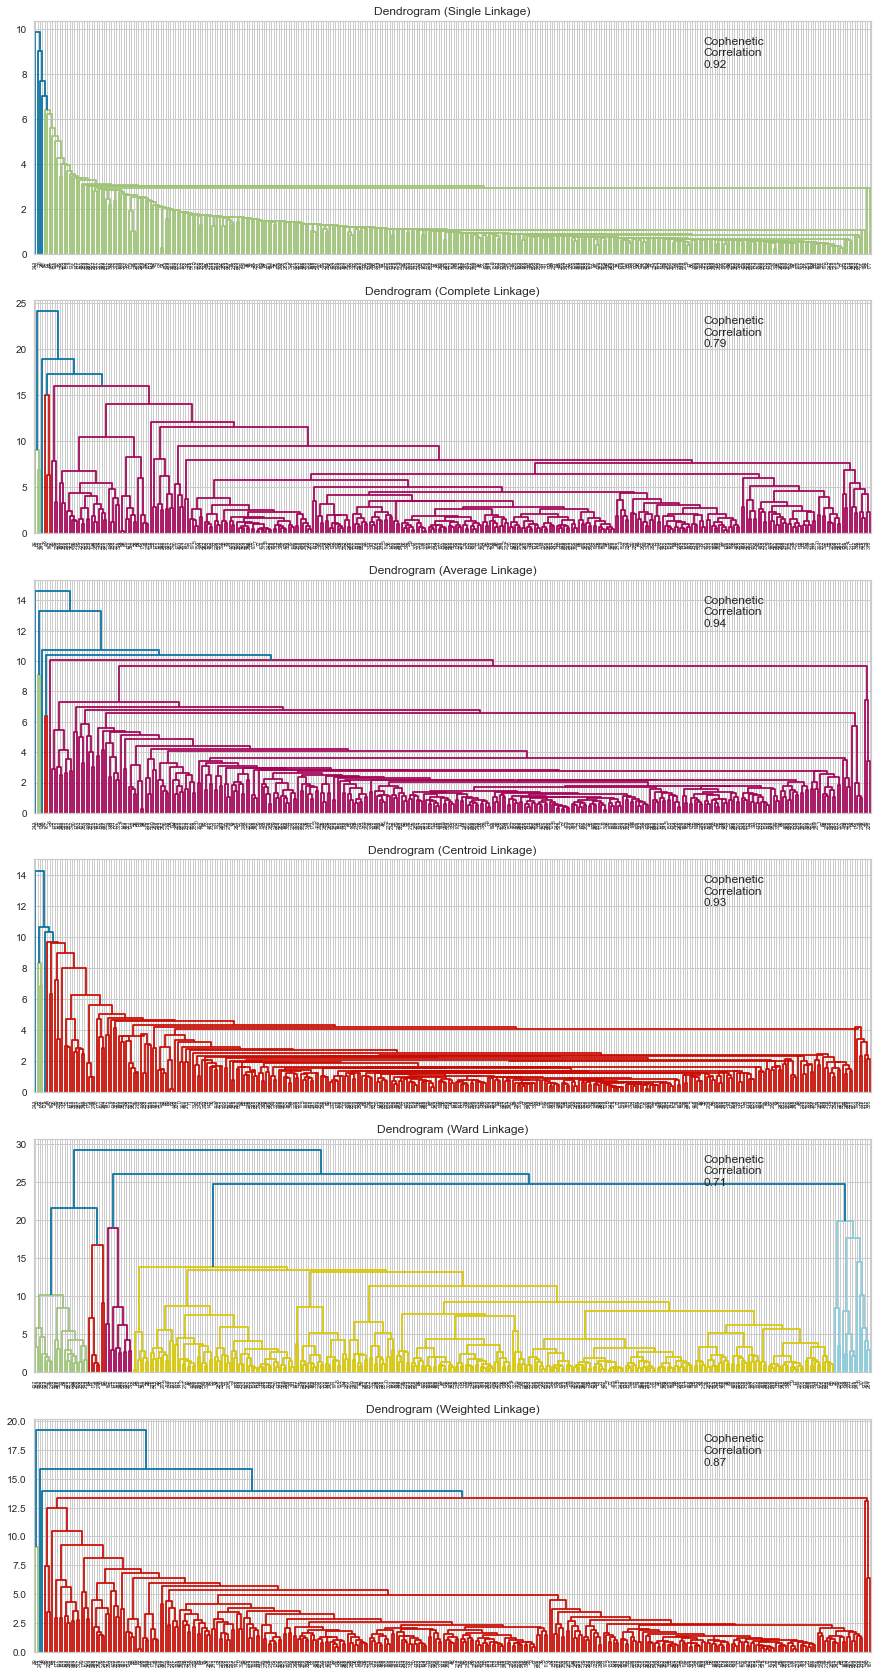

<IPython.core.display.Javascript object>

In [39]:
%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

## Notes 

* The Dendrograms show that the Euclidean distance and average linkage is the best at a Cophenetic Correlation at 0.94
* However, the Dendrograms show that the Euclidean distance and centroid linkage is a close second with a Cophenetic Correlation at 0.93
* Single linkage is also a close third with a Cophenetic Correlation at 0.92

In [40]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient", ascending=False)
df_cc

Linkage  Cophenetic Coefficient
2   average                   0.942
3  centroid                   0.931
0    single                   0.923
5  weighted                   0.869
1  complete                   0.787
4      ward                   0.710

<IPython.core.display.Javascript object>

## Notes

    The Dendrograms show that the Euclidean distance and average linkage is the best at a Cophenetic Correlation at 0.94

### Creating Model using sklearn

In [41]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

## Notes: 

* I am going to trust the notebook 

In [42]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [43]:
cluster_profile = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [44]:
cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [45]:
cluster_profile.style.highlight_max(color="yellow", axis=0)


<IPython.core.display.Javascript object>

## Notes: 

The numbers should be showing up with yellow highlights, but for some reason they are not

In [46]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

<IPython.core.display.Javascript object>

## Notes 

* there is one cluster, the first, with pratically all the companies, while the other clusters have 1 or 2 companies each 


In [47]:
df2.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

<IPython.core.display.Javascript object>

## Notes 

* As with the last section, the first segmwnt contains pratically all the sectors
* Other segments contain one or two sectors each 

Wall time: 1.16 s


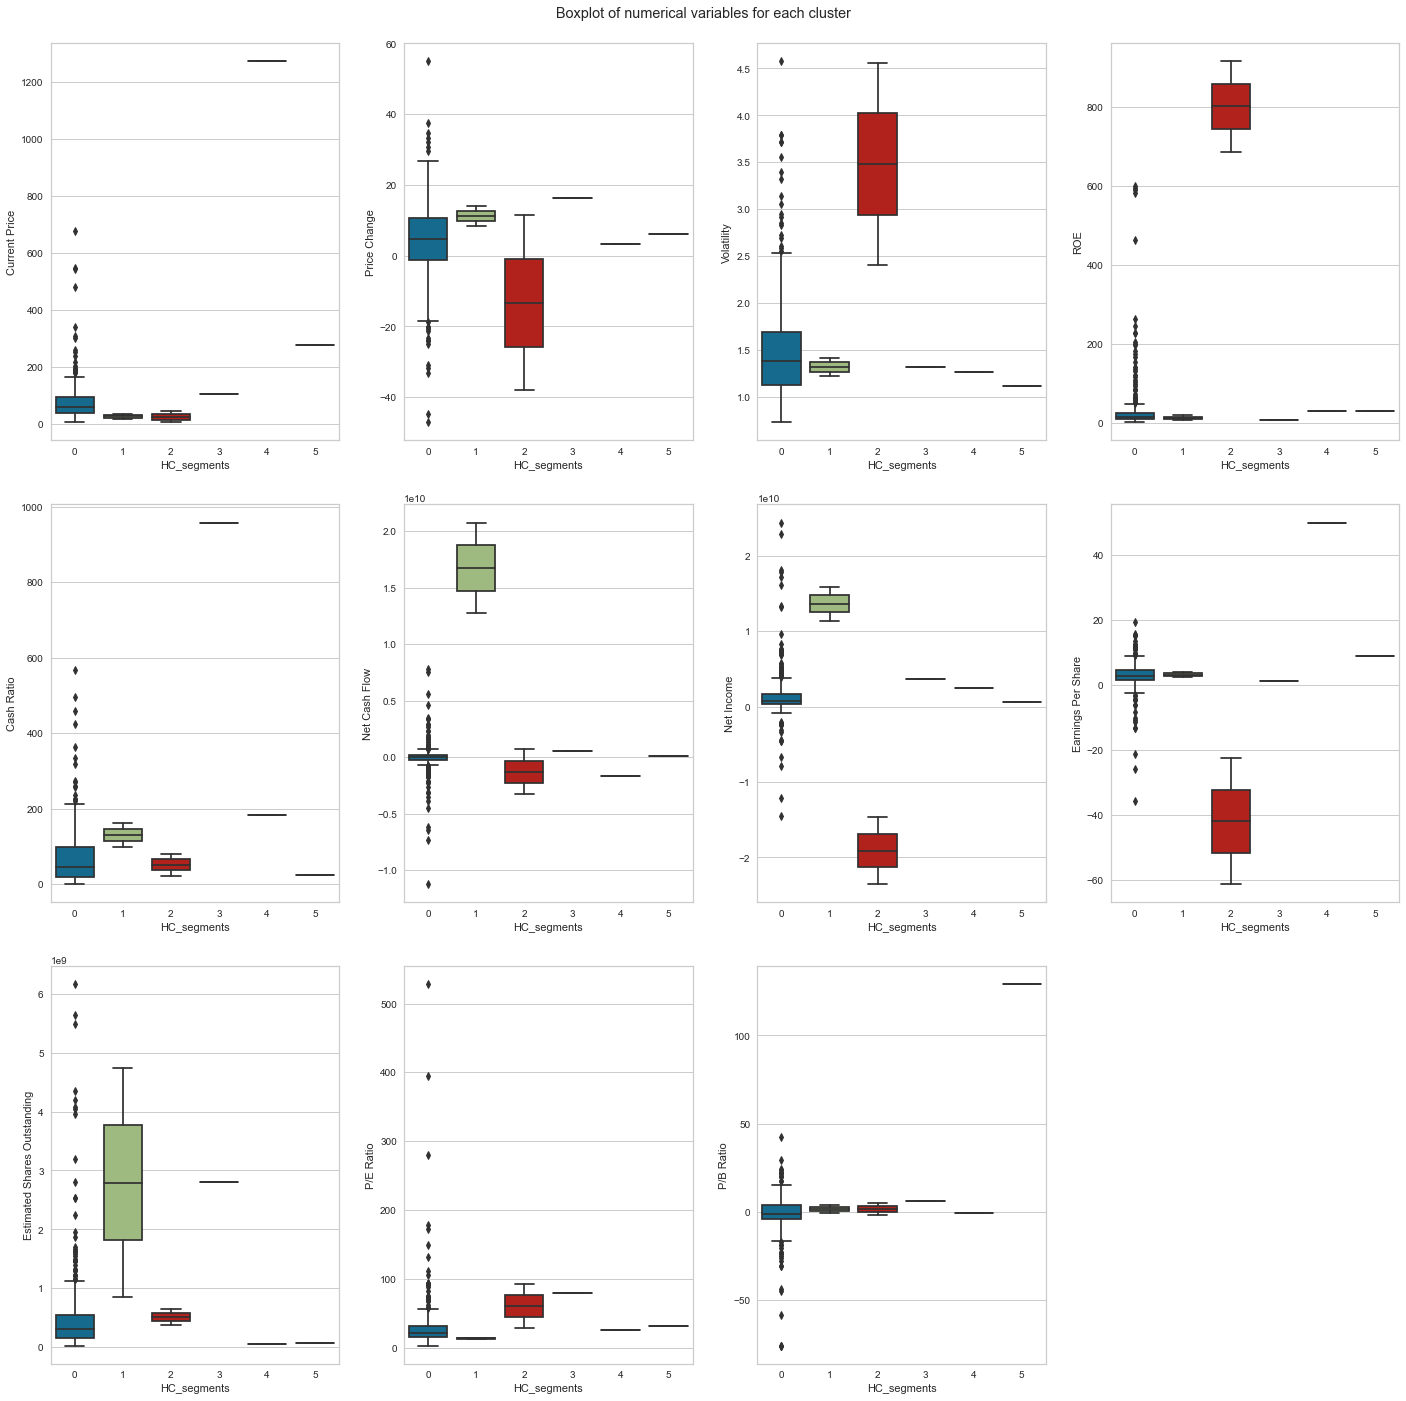

<IPython.core.display.Javascript object>

In [48]:
%%time

plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(cols_list):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## Notes: 

* Sector 0 has the most companies and as such has the greatest variance in the data and the most outliers 
* Sector 2 only has two sectors in it and has a low variance and no outliers 
* The rest of the sectors contain only 1 sector each and are flat when it comes to variance and outliers 
    * This is to be expected 

<AxesSubplot:xlabel='HC_segments'>

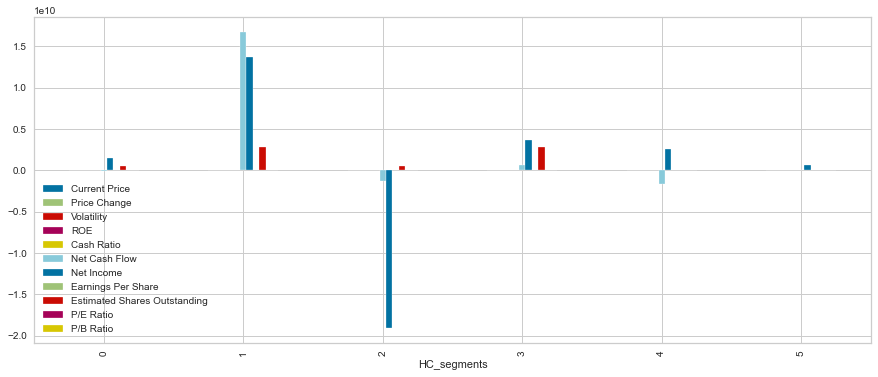

<IPython.core.display.Javascript object>

In [49]:
df2.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

## Notes 

* Sector 0
    * It has a positive current price and Estimated Shares Outstanding 
    * Net cash flow is flat 
    * Could be a good investment are if you are looking for a nice stable investment 
    
* Sector 1 
    * High net cash flow 
    * High net income 
    * Moderate risk level 
    * Could be a good investment area if willing to accept some risk for good rewards 

* Sector 2:
    * Very low net income 
        * Companies burning cash faster than making it
    * There is also some volatility in the market 
    * Seems like a model that includes many start ups 

* Sector 3: 
    * High net income 
    * High volatility
    * Could make a lot or loose a lot in this sector 

* Sector 4:  
    * High net income 
    * Net cash flow is negative 
    * Making many sales, but also burning a good deal of cash 
    * It looks positive, but the cash flow versus net case flow is not good 
    * Could make a lot or loose a lot in this sector 

* Sector 5: 
    * For the colours, I looks like a good current price, but not much else 
    * Could be a good sector if looking for a nice stable sector to invest 
 